In [1501]:
import pandas as pd
import numpy as np
import math as m
from time import sleep
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
import hvplot.pandas

In [2]:
financial = pd.read_csv('sp500_annual_financial.csv')

In [3]:
ratios = pd.read_csv('sp500_stock_price_rel_ratio.csv')

In [4]:
financial

,Unnamed: 0,date,company,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,...,Capital Expenditures,Change To Operating Activities,EPS,book_value,sharesoutstanding,bookvalue_per_share,ROE,ROA,Operating_CF_per_share,Sale_per_share
0,0.0,2020-12-31,MMM,5.835000e+09,6.162000e+09,3.441300e+10,1.286700e+10,64000000.0,2.346000e+09,4.734400e+10,...,-1.501000e+09,NaN,9.287963,7.096000e+09,5.796750e+08,12.241342,0.416364,0.113721,13.995773,55.520765
1,1.0,2019-12-31,MMM,6.379000e+09,5.907000e+09,3.453300e+10,1.006300e+10,63000000.0,2.092000e+09,4.465900e+10,...,-1.699000e+09,NaN,7.883728,3.747000e+09,5.796750e+08,6.463967,0.451313,0.102331,12.196489,55.437960
2,2.0,2018-12-31,MMM,2.657000e+09,5.643000e+09,2.665200e+10,9.796000e+09,52000000.0,1.852000e+09,3.650000e+10,...,-1.577000e+09,NaN,9.227584,7.191000e+09,5.796750e+08,12.405227,0.543156,0.146548,11.107948,56.523051
3,3.0,2017-12-31,MMM,2.936000e+09,5.352000e+09,2.636500e+10,1.156300e+10,59000000.0,1.948000e+09,3.798700e+10,...,-1.373000e+09,NaN,8.380558,8.686000e+09,5.796750e+08,14.984258,0.418000,0.127886,10.764652,54.611635
4,4.0,2020-12-31,ABT,1.478400e+10,NaN,3.954500e+10,3.278400e+10,219000000.0,1.658000e+09,7.254800e+10,...,-2.177000e+09,-627000000.0,2.529800,1.821900e+10,1.776820e+09,10.253712,0.136200,0.061959,4.446708,19.477494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995.0,2017-12-31,ZION,2.000000e+07,NaN,5.860900e+10,7.113000e+09,NaN,NaN,6.628800e+10,...,-1.690000e+08,37000000.0,3.613811,7.659000e+09,1.638160e+08,46.753675,0.077093,0.008931,5.664892,15.779899
1996,1996.0,2020-12-31,ZTS,1.710000e+09,1.065000e+09,9.836000e+09,3.769000e+09,4000000.0,2.030000e+08,1.360900e+10,...,-4.530000e+08,40000000.0,3.450113,2.063000e+09,4.747670e+08,4.345289,0.434137,0.120362,4.477986,14.059528
1997,1997.0,2019-12-31,ZTS,1.890000e+09,1.044000e+09,8.837000e+09,2.708000e+09,NaN,1.710000e+08,1.154500e+10,...,-4.600000e+08,32000000.0,3.159444,8.180000e+08,4.747670e+08,1.722950,0.553914,0.129926,3.780802,13.185415
1998,1998.0,2018-12-31,ZTS,2.046000e+09,1.026000e+09,8.592000e+09,2.185000e+09,NaN,1.750000e+08,1.077700e+10,...,-3.380000e+08,81000000.0,3.007791,1.390000e+08,4.747670e+08,0.292775,0.653547,0.132504,3.770270,12.269176


In [5]:
ratios

,Unnamed: 0,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
0,0,2018-01-02,MMM,207.632899,208.768909,205.017453,207.509613,2931000.0,24.760835,13.848508,19.276945,3.799733
1,1,2018-01-03,MMM,207.007678,207.588878,205.440160,207.500824,2193700.0,24.759786,13.847921,19.276128,3.799572
2,2,2018-01-04,MMM,208.707281,210.856000,208.240553,210.213150,2243100.0,25.083431,14.028933,19.528094,3.849237
3,3,2018-01-05,MMM,210.160269,212.141667,209.358914,211.851074,1835900.0,25.278875,14.138242,19.680252,3.879230
4,4,2018-01-08,MMM,210.803140,212.176907,210.627005,211.164185,1869000.0,25.196912,14.092402,19.616442,3.866652
...,...,...,...,...,...,...,...,...,...,...,...,...
481786,492429,2021-11-23,ZTS,223.089996,225.309998,220.899994,223.660004,1098700.0,64.826856,51.471833,49.946562,15.908074
481787,492430,2021-11-24,ZTS,223.639999,224.960007,221.070007,223.169998,1177900.0,64.684830,51.359066,49.837137,15.873221
481788,492431,2021-11-26,ZTS,220.679993,225.960007,218.500000,219.320007,976500.0,63.568928,50.473051,48.977377,15.599386
481789,492432,2021-11-29,ZTS,221.449997,225.559998,220.690002,223.550003,1391600.0,64.794973,51.446518,49.921997,15.900250


In [6]:
financial.drop(columns='Unnamed: 0', inplace= True)

In [7]:
ratios.drop(columns='Unnamed: 0', inplace= True)

# S&P 500 index time series forcast

In [945]:
import yfinance as yf

In [267]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [1041]:
sp500 = yf.Ticker('^GSPC')

In [1042]:
index_20years_daily = sp500.history(period='20y', interval= '1d')

In [1043]:
index_20years_daily = index_20years_daily['Close']

In [1044]:
index_20years_daily.describe().transpose()

count    5034.000000
mean     1806.263019
std       869.454274
min       676.530029
25%      1166.180023
50%      1425.039978
75%      2213.070068
max      4704.540039
Name: Close, dtype: float64

In [1045]:
type(index_20years_daily)

pandas.core.series.Series

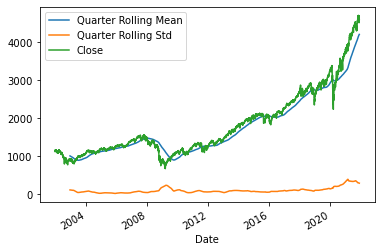

In [1046]:
index_20years_daily.rolling(250).mean().plot(label = 'Quarter Rolling Mean')
index_20years_daily.rolling(250).std().plot(label = 'Quarter Rolling Std')
index_20years_daily.plot()
plt.legend()

In [1047]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [1069]:
decomp = seasonal_decompose(index_20years_daily,period=(65), model = 'additive')

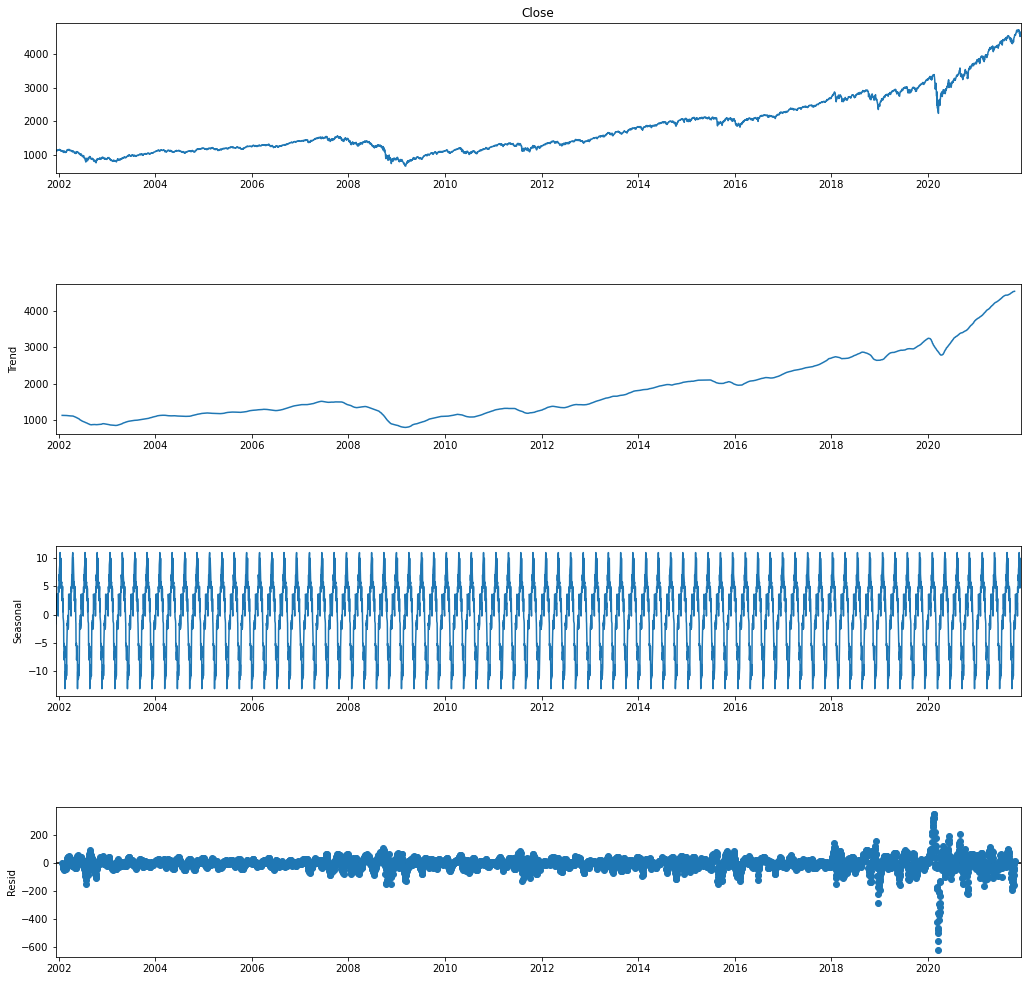

In [1070]:
fig = decomp.plot()
fig.set_size_inches(16,16)

In [1078]:
every_info = sp500.history(period='max',freq = '1d')

In [1079]:
every_info.drop(columns=['Dividends','Stock Splits'], inplace= True)

In [1084]:
every_info.resample(rule = 'A').mean()

,Open,High,Low,Close,Volume
Date,,,,,
1950-12-31,18.397269,18.397269,18.397269,18.397269,2.009237e+06
1951-12-31,22.321888,22.321888,22.321888,22.321888,1.717590e+06
1952-12-31,24.496160,24.496160,24.496160,24.496160,1.308160e+06
1953-12-31,24.722590,24.722590,24.722590,24.722590,1.413147e+06
1954-12-31,29.724087,29.724087,29.724087,29.724087,2.269762e+06
...,...,...,...,...,...
2017-12-31,2448.275888,2454.344818,2441.850751,2449.076379,3.412303e+09
2018-12-31,2747.910717,2762.645180,2730.284103,2746.214183,3.612422e+09
2019-12-31,2911.627625,2923.622342,2899.439927,2913.356380,3.540834e+09


<AxesSubplot:xlabel='Date'>

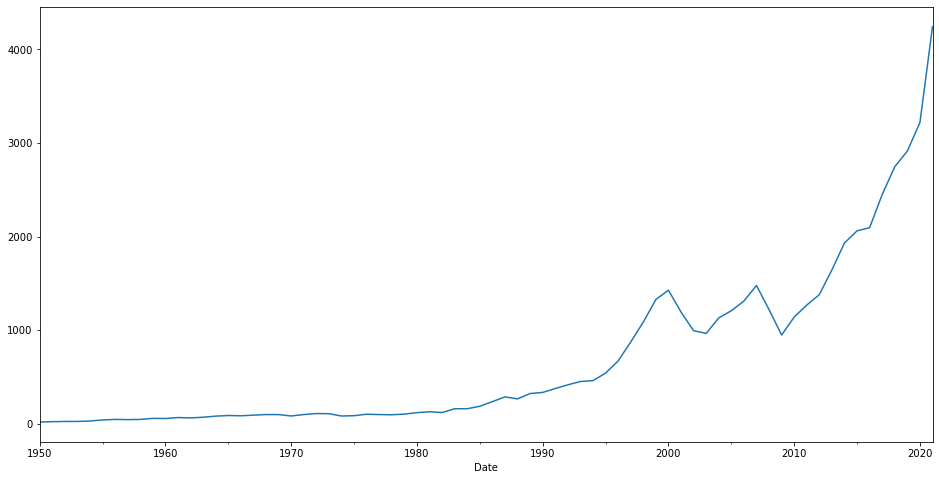

In [1478]:
every_info['Close'].resample('A').mean().plot(kind = 'line', figsize = (16,8))

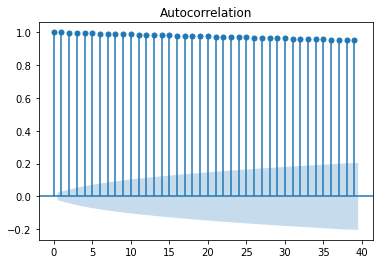

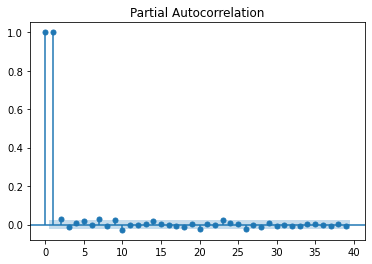

In [999]:
plot_acf(index_5years_daily['Close'].iloc[:-30])
plot_pacf(index_5years_daily['Close'].iloc[:-30])
plt.show()

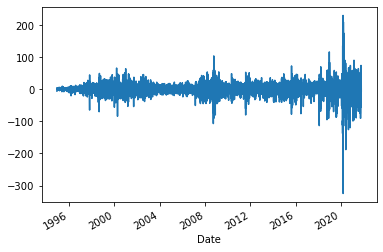

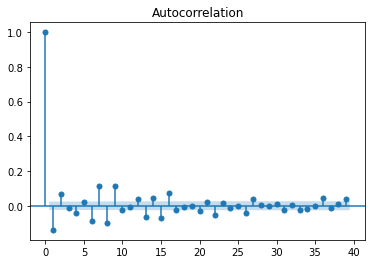

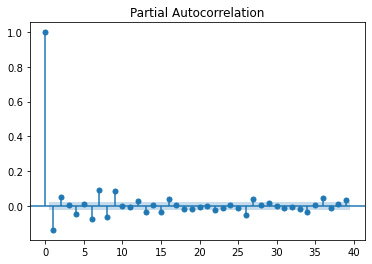

In [1000]:
diff_1=index_5years_daily['Close'].diff(periods=1).iloc[1:-30]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [1510]:
index_20years_daily = sp500.history(period='20y', freq = '1d')

In [1512]:
index_20years_daily = index_20years_daily['Close']

In [1513]:
index_20years_daily.iloc[:-5]

Date
2001-12-10    1139.930054
2001-12-11    1136.760010
2001-12-12    1137.069946
2001-12-13    1119.380005
2001-12-14    1123.089966
                 ...     
2021-11-23    4690.700195
2021-11-24    4701.459961
2021-11-26    4594.620117
2021-11-29    4655.270020
2021-11-30    4567.000000
Name: Close, Length: 5029, dtype: float64

In [1514]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(index_20years_daily.iloc[:-5], order=(2,1,2))
model_fit = model.fit(trend='c',transparams=True,full_output=True, disp=1, maxiter=5000)
print(model_fit.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.46893D+00    |proj g|=  1.01341D-04

At iterate    1    f=  4.46893D+00    |proj g|=  9.13936D-05

At iterate    2    f=  4.46893D+00    |proj g|=  5.08038D-05

At iterate    3    f=  4.46893D+00    |proj g|=  4.96492D-05

At iterate    4    f=  4.46893D+00    |proj g|=  7.51399D-05

At iterate    5    f=  4.46893D+00    |proj g|=  6.39488D-05

At iterate    6    f=  4.46893D+00    |proj g|=  1.72751D-04

At iterate    7    f=  4.46893D+00    |proj g|=  2.14939D-05

At iterate    8    f=  4.46893D+00    |proj g|=  1.56319D-05

At iterate    9    f=  4.46893D+00    |proj g|=  9.23706D-06

At iterate   10    f=  4.46893D+00    |proj g|=  6.83897D-06

At iterate   11    f=  4.46893D+00    |proj g|=  5.15143D-06

At iterate   12    f=  4.46893D+00    |proj g|=  2.84217D-06

At iterate   13    f=  4.4

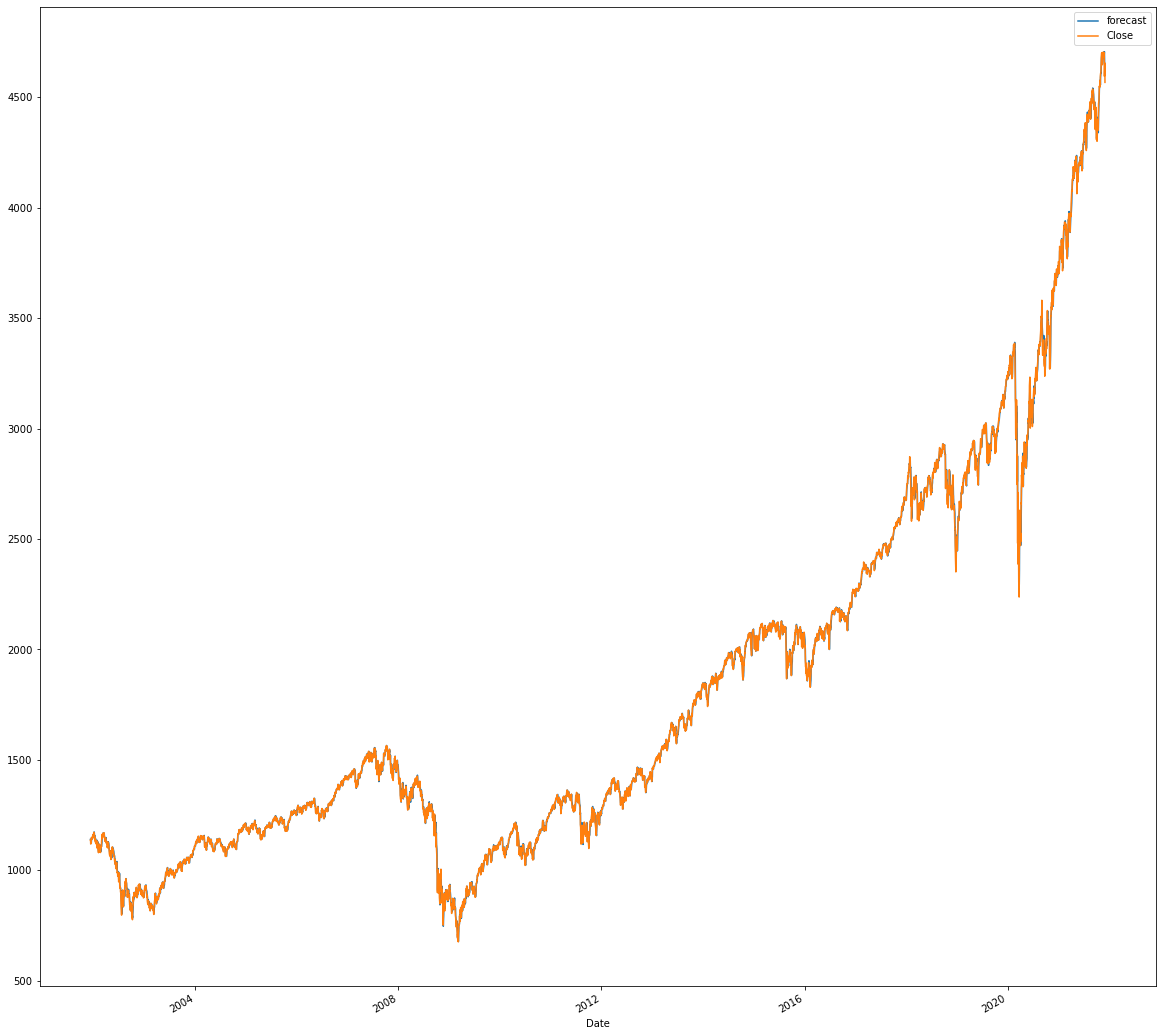

In [1515]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(20,20))
    pred_fig = model_fit.plot_predict()

In [1516]:
fore, std, con_int = model_fit.forecast(steps=4)
print(fore, std)

[4580.26404752 4577.9331022  4572.83110105 4586.07934847] [21.11449852 28.26934076 34.75033144 39.99673436]


In [1517]:
compare_pred = {}
compare_pred['y'] =  index_5years_daily[-4:]
compare_pred['prediction'] = fore
compare_pred['std'] = std

In [1518]:
index_result = pd.DataFrame(compare_pred)

In [1519]:
index_result

,y,prediction,std
Date,,,
2021-12-02,4577.100098,4580.264048,21.114499
2021-12-03,4538.430176,4577.933102,28.269341
2021-12-06,4591.669922,4572.831101,34.750331
2021-12-07,4686.750000,4586.079348,39.996734


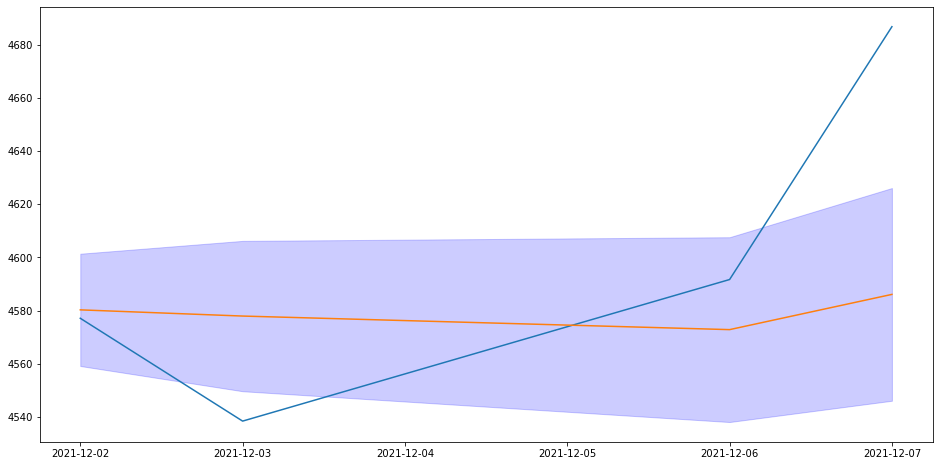

In [1520]:
plt.figure(figsize=(16,8))
plt.plot(index_result.index, index_result['y'])
plt.plot(index_result.index, index_result['prediction'])
plt.fill_between(index_result.index, index_result.prediction+std, index_result.prediction -std,color='b', alpha=0.2)


In [1521]:
index_20years_daily

Date
2001-12-10    1139.930054
2001-12-11    1136.760010
2001-12-12    1137.069946
2001-12-13    1119.380005
2001-12-14    1123.089966
                 ...     
2021-12-01    4513.040039
2021-12-02    4577.100098
2021-12-03    4538.430176
2021-12-06    4591.669922
2021-12-07    4686.750000
Name: Close, Length: 5034, dtype: float64

In [1118]:
from prophet import Prophet

In [1529]:
prophet = Prophet(seasonality_mode='multiplicative', yearly_seasonality= True, weekly_seasonality=True, daily_seasonality= True, changepoint_prior_scale=0.5)

In [1530]:
close = pd.DataFrame(index_20years_daily)

In [1531]:
close.reset_index(inplace=True)

In [1532]:
close.rename(columns={'Date' : 'ds', 'Close' : 'y'}, inplace=True)

In [1533]:
X, Y = close.iloc[:-5], close.iloc[-5:]

In [1534]:
X

,ds,y
0,2001-12-10,1139.930054
1,2001-12-11,1136.760010
2,2001-12-12,1137.069946
3,2001-12-13,1119.380005
4,2001-12-14,1123.089966
...,...,...
5024,2021-11-23,4690.700195
5025,2021-11-24,4701.459961
5026,2021-11-26,4594.620117
5027,2021-11-29,4655.270020


In [1535]:
prophet.fit(X)

Initial log joint probability = -153.442


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       13582.2      0.112978         13308           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       14417.9     0.0180651       1602.28           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299         14524    0.00941441       2910.74      0.6054      0.6054      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       14661.9    0.00525679       1112.12           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       14734.1    0.00832395       3066.45      0.8977      0.8977      577   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [1536]:
future_data = prophet.make_future_dataframe(periods=5, freq='B')
forcast_data = prophet.predict(future_data)

In [1537]:
forcast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2001-12-10,-339.208649,1047.508114,1407.132573,-339.208649,-339.208649,-4.386343,-4.386343,-4.386343,-4.595415,...,-0.215639,-0.215639,-0.215639,0.006567,0.006567,0.006567,0.0,0.0,0.0,1219.595974
1,2001-12-11,-338.849955,1041.254280,1384.772338,-338.849955,-338.849955,-4.386343,-4.386343,-4.386343,-4.597503,...,-0.221497,-0.221497,-0.221497,0.010337,0.010337,0.010337,0.0,0.0,0.0,1219.013638
2,2001-12-12,-338.491260,1038.971021,1390.392835,-338.491260,-338.491260,-4.386343,-4.386343,-4.386343,-4.591875,...,-0.219258,-0.219258,-0.219258,0.013726,0.013726,0.013726,0.0,0.0,0.0,1215.818277
3,2001-12-13,-338.132566,1034.515021,1379.989648,-338.132566,-338.132566,-4.386343,-4.386343,-4.386343,-4.588832,...,-0.219198,-0.219198,-0.219198,0.016709,0.016709,0.016709,0.0,0.0,0.0,1213.501041
4,2001-12-14,-337.773871,1031.758014,1382.148171,-337.773871,-337.773871,-4.386343,-4.386343,-4.386343,-4.588071,...,-0.220993,-0.220993,-0.220993,0.019265,0.019265,0.019265,0.0,0.0,0.0,1211.956750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5029,2021-12-01,-1150.241745,4021.485622,4373.614087,-1150.241745,-1150.241745,-4.386343,-4.386343,-4.386343,-4.643297,...,-0.219258,-0.219258,-0.219258,-0.037696,-0.037696,-0.037696,0.0,0.0,0.0,4190.672665
5030,2021-12-02,-1150.581441,4016.952712,4361.109592,-1150.581441,-1150.581441,-4.386343,-4.386343,-4.386343,-4.638010,...,-0.219198,-0.219198,-0.219198,-0.032469,-0.032469,-0.032469,0.0,0.0,0.0,4185.826839
5031,2021-12-03,-1150.921138,3994.448932,4353.162687,-1150.921138,-1150.921138,-4.386343,-4.386343,-4.386343,-4.634526,...,-0.220993,-0.220993,-0.220993,-0.027189,-0.027189,-0.027189,0.0,0.0,0.0,4183.052647
5032,2021-12-06,-1151.940227,3996.929501,4336.453472,-1151.940227,-1151.940227,-4.386343,-4.386343,-4.386343,-4.613589,...,-0.215639,-0.215639,-0.215639,-0.011607,-0.011607,-0.011607,0.0,0.0,0.0,4162.639060


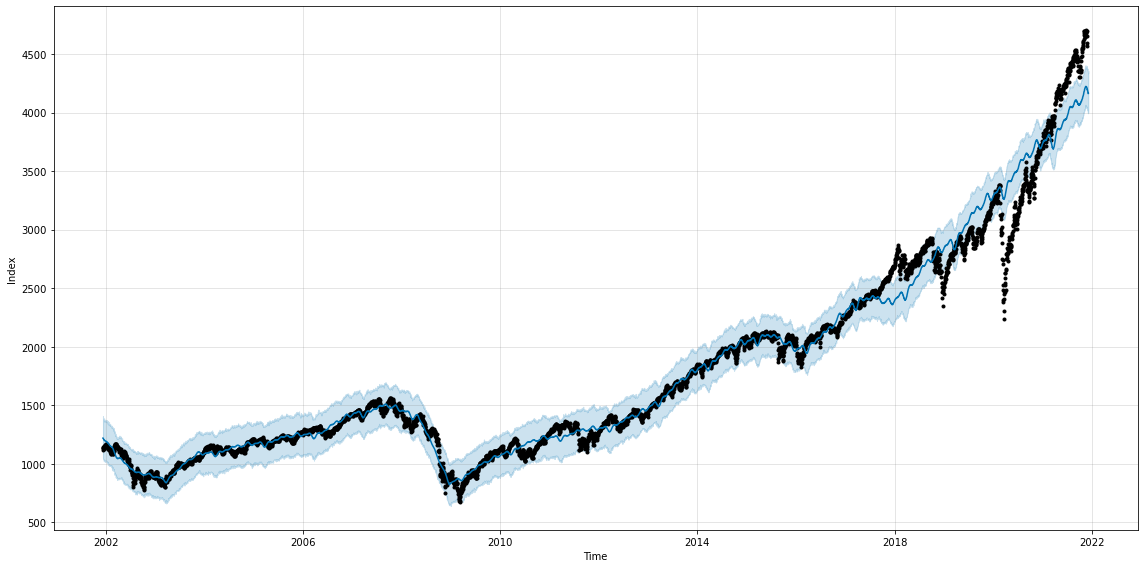

In [1538]:
fig1 = prophet.plot(forcast_data, figsize = (16,8), xlabel='Time', ylabel= 'Index')

In [1539]:
compare_prophet = forcast_data.iloc[-5:]
compare_prophet_y = compare_prophet[['ds','yhat','yhat_lower','yhat_upper']]
compare_prophet_y

,ds,yhat,yhat_lower,yhat_upper
5029,2021-12-01,4190.672665,4021.485622,4373.614087
5030,2021-12-02,4185.826839,4016.952712,4361.109592
5031,2021-12-03,4183.052647,3994.448932,4353.162687
5032,2021-12-06,4162.639060,3996.929501,4336.453472
5033,2021-12-07,4164.943294,3998.661946,4357.293708


In [1540]:
Y

,ds,y
5029,2021-12-01,4513.040039
5030,2021-12-02,4577.100098
5031,2021-12-03,4538.430176
5032,2021-12-06,4591.669922
5033,2021-12-07,4686.750000


In [1541]:
compare_for_vis = pd.merge(compare_prophet_y,Y, on = 'ds')
compare_for_vis

,ds,yhat,yhat_lower,yhat_upper,y
0,2021-12-01,4190.672665,4021.485622,4373.614087,4513.040039
1,2021-12-02,4185.826839,4016.952712,4361.109592,4577.100098
2,2021-12-03,4183.052647,3994.448932,4353.162687,4538.430176
3,2021-12-06,4162.639060,3996.929501,4336.453472,4591.669922
4,2021-12-07,4164.943294,3998.661946,4357.293708,4686.750000


In [1542]:
compare_for_vis.set_index('ds', inplace=True)

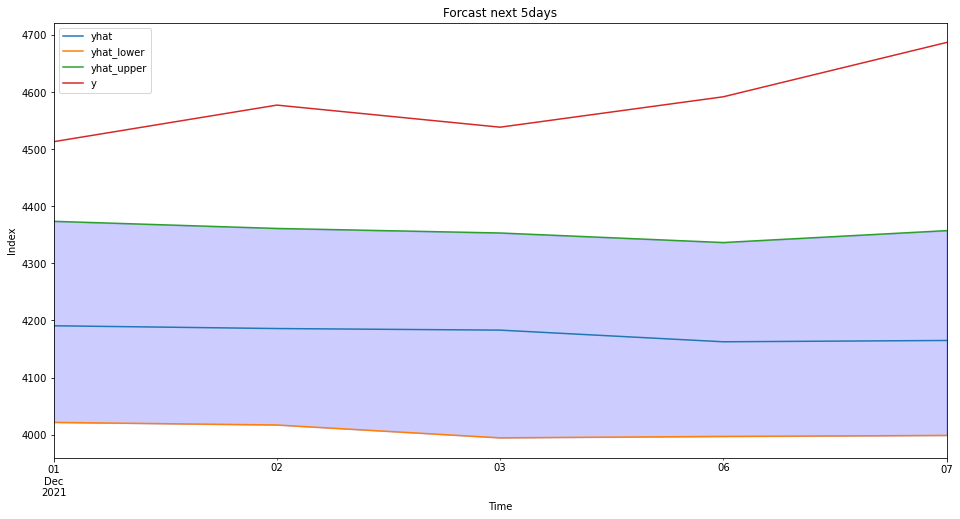

In [1545]:
compare_for_vis.plot(figsize = (16,8),title = 'Forcast next 5days',xlabel = 'Time', ylabel = 'Index');
plt.fill_between(compare_for_vis.index, compare_for_vis['yhat_lower'], compare_for_vis['yhat_upper'], color='b', alpha=0.2)

# Back test

### If I buy 02-01-2018 with strategy (PER, PBR, PCR rankings), what happened after 1, 2 or 3years?

In [8]:
price_first_2018 = ratios[ratios.Date == '2018-01-02']

In [9]:
price_first_2018 = round(price_first_2018, 2)

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
277781,2018-01-02,LYV,42.73,42.80,42.31,42.65,926800.0,-1550.60,16.52,14.96,0.96
107648,2018-01-02,CTXS,85.62,86.43,85.21,85.72,1330700.0,-513.73,12.51,11.72,3.77
6841,2018-01-02,AMD,10.42,11.02,10.34,10.98,44146300.0,-404.27,37.37,1111.74,2.54
274823,2018-01-02,LLY,77.81,78.30,77.44,78.01,3456700.0,-366.55,9.79,13.32,3.75
321484,2018-01-02,NEM,34.11,34.50,34.06,34.37,5325800.0,-241.55,NaN,12.96,3.73
...,...,...,...,...,...,...,...,...,...,...,...
477847,2018-01-02,ZBRA,104.10,105.14,102.75,103.71,310600.0,326.45,10.37,11.61,1.49
71334,2018-01-02,BSX,24.94,25.52,24.84,25.28,9980500.0,345.39,30.57,25.19,3.97
461146,2018-01-02,WAT,194.12,196.64,193.60,195.69,355300.0,594.46,6.02,17.31,5.23
237258,2018-01-02,IR,34.18,34.26,33.40,33.70,814700.0,768.20,309.98,70.50,5.95


In [110]:
per_rank = price_first_2018[price_first_2018.PER > 0].sort_values('PER', ascending= True)
per_rank['per_rank'] = per_rank.PER.rank(method = 'dense',na_option = 'bottom')
per_rank


,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR,per_rank
126583,2018-01-02,CSX,17.71,18.03,17.52,17.94,17643900.0,2.48,NaN,3.91,1.19,1.0
320498,2018-01-02,NWL,26.30,26.86,26.21,26.77,4264400.0,4.14,2.86,11.78,1.02,2.0
366483,2018-01-02,PRU,95.34,95.78,94.81,95.57,2207100.0,4.79,1.12,2.80,0.63,3.0
283674,2018-01-02,LYB,76.01,76.84,75.76,76.82,1127800.0,5.26,3.06,4.93,0.74,4.0
124611,2018-01-02,CTRA,28.31,28.95,28.22,28.90,5244300.0,5.49,NaN,0.61,0.32,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
477847,2018-01-02,ZBRA,104.10,105.14,102.75,103.71,310600.0,326.45,10.37,11.61,1.49,364.0
71334,2018-01-02,BSX,24.94,25.52,24.84,25.28,9980500.0,345.39,30.57,25.19,3.97,365.0
461146,2018-01-02,WAT,194.12,196.64,193.60,195.69,355300.0,594.46,6.02,17.31,5.23,366.0
237258,2018-01-02,IR,34.18,34.26,33.40,33.70,814700.0,768.20,309.98,70.50,5.95,367.0


In [116]:
pbr_rank = per_rank[per_rank.PBR > 0].sort_values('PBR', ascending= True)
pbr_rank['pbr_rank'] = per_rank.PBR.rank(method='dense', na_option='bottom') -38
pbr_rank

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR,per_rank,pbr_rank
280739,2018-01-02,L,49.19,49.20,48.64,48.85,1104900.0,11.04,0.55,4.96,0.94,52.0,1.0
152754,2018-01-02,DD,90.58,91.37,90.37,91.00,5220795.0,41.78,0.71,-63.30,4.15,293.0,2.0
219528,2018-01-02,HPE,12.75,12.93,12.71,12.91,7155700.0,49.01,0.75,12.63,0.58,314.0,3.0
106662,2018-01-02,CFG,36.24,36.52,35.96,36.52,5073100.0,9.42,0.81,8.26,2.89,33.0,4.0
80083,2018-01-02,COF,94.05,94.17,92.81,93.61,1663700.0,21.32,0.88,2.98,2.15,179.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188697,2018-01-02,FMC,77.68,78.14,77.44,77.96,1361693.0,18.75,206.31,29.95,3.97,148.0,261.0
418454,2018-01-02,TFX,244.71,251.33,244.71,250.38,304500.0,76.71,250.11,27.87,5.45,338.0,262.0
237258,2018-01-02,IR,34.18,34.26,33.40,33.70,814700.0,768.20,309.98,70.50,5.95,367.0,263.0
17687,2018-01-02,ALLE,76.88,76.88,76.03,76.72,645400.0,25.26,616.38,19.88,2.87,217.0,264.0


In [119]:
pcr_rank = pbr_rank[pbr_rank.PCR > 0].sort_values('PCR', ascending= True)
pcr_rank['pcr_rank'] = per_rank.PCR.rank(method='dense', na_option='bottom')-8
pcr_rank

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR,per_rank,pbr_rank,pcr_rank
189683,2018-01-02,F,10.72,10.84,10.70,10.84,20773300.0,5.50,1.20,2.35,0.27,6.0,18.0,1.0
408803,2018-01-02,SYF,34.94,35.12,34.69,35.00,3326900.0,10.52,1.51,2.37,2.88,47.0,34.0,2.0
366483,2018-01-02,PRU,95.34,95.78,94.81,95.57,2207100.0,4.79,1.12,2.80,0.63,3.0,13.0,3.0
80083,2018-01-02,COF,94.05,94.17,92.81,93.61,1663700.0,21.32,0.88,2.98,2.15,179.0,5.0,4.0
300294,2018-01-02,MET,43.60,43.64,42.60,43.06,5424500.0,9.42,0.96,3.08,0.61,33.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237258,2018-01-02,IR,34.18,34.26,33.40,33.70,814700.0,768.20,309.98,70.50,5.95,367.0,263.0,349.0
456425,2018-01-02,WAB,79.73,81.09,78.48,80.91,760200.0,58.30,9.42,81.00,3.94,331.0,205.0,350.0
243174,2018-01-02,IFF,140.13,141.52,139.67,141.52,264500.0,119.11,27.65,90.12,10.36,350.0,246.0,351.0
265332,2018-01-02,KHC,64.59,64.66,63.48,63.60,4009000.0,7.11,11.71,155.27,2.98,16.0,222.0,353.0


In [120]:
pcr_rank['sum'] = pcr_rank.per_rank + pcr_rank.pbr_rank + pcr_rank.pcr_rank
pcr_rank

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR,per_rank,pbr_rank,pcr_rank,sum
189683,2018-01-02,F,10.72,10.84,10.70,10.84,20773300.0,5.50,1.20,2.35,0.27,6.0,18.0,1.0,25.0
408803,2018-01-02,SYF,34.94,35.12,34.69,35.00,3326900.0,10.52,1.51,2.37,2.88,47.0,34.0,2.0,83.0
366483,2018-01-02,PRU,95.34,95.78,94.81,95.57,2207100.0,4.79,1.12,2.80,0.63,3.0,13.0,3.0,19.0
80083,2018-01-02,COF,94.05,94.17,92.81,93.61,1663700.0,21.32,0.88,2.98,2.15,179.0,5.0,4.0,188.0
300294,2018-01-02,MET,43.60,43.64,42.60,43.06,5424500.0,9.42,0.96,3.08,0.61,33.0,7.0,5.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237258,2018-01-02,IR,34.18,34.26,33.40,33.70,814700.0,768.20,309.98,70.50,5.95,367.0,263.0,349.0,979.0
456425,2018-01-02,WAB,79.73,81.09,78.48,80.91,760200.0,58.30,9.42,81.00,3.94,331.0,205.0,350.0,886.0
243174,2018-01-02,IFF,140.13,141.52,139.67,141.52,264500.0,119.11,27.65,90.12,10.36,350.0,246.0,351.0,947.0
265332,2018-01-02,KHC,64.59,64.66,63.48,63.60,4009000.0,7.11,11.71,155.27,2.98,16.0,222.0,353.0,591.0


In [121]:
pebcr_sum = pcr_rank.sort_values('sum',ascending=True)

In [122]:
pebcr_sum.head(10)

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR,per_rank,pbr_rank,pcr_rank,sum
366483,2018-01-02,PRU,95.34,95.78,94.81,95.57,2207100.0,4.79,1.12,2.80,0.63,3.0,13.0,3.0,19.0
189683,2018-01-02,F,10.72,10.84,10.70,10.84,20773300.0,5.50,1.20,2.35,0.27,6.0,18.0,1.0,25.0
300294,2018-01-02,MET,43.60,43.64,42.60,43.06,5424500.0,9.42,0.96,3.08,0.61,33.0,7.0,5.0,45.0
155651,2018-01-02,ETN,42.20,42.36,41.29,42.01,2814900.0,5.61,1.39,6.28,0.82,8.0,27.0,30.0,65.0
282688,2018-01-02,LUMN,11.90,12.31,11.76,12.30,12444400.0,9.79,1.27,3.51,0.77,37.0,23.0,6.0,66.0
9799,2018-01-02,AFL,40.16,40.29,39.84,39.98,4227200.0,5.90,1.80,4.43,1.25,9.0,45.0,12.0,66.0
280739,2018-01-02,L,49.19,49.20,48.64,48.85,1104900.0,11.04,0.55,4.96,0.94,52.0,1.0,15.0,68.0
443856,2018-01-02,VLO,76.09,76.87,75.69,76.59,3582900.0,7.70,1.38,5.71,0.35,20.0,26.0,26.0,72.0
362664,2018-01-02,PFG,61.40,61.52,60.31,60.71,760300.0,7.15,2.02,3.94,1.17,17.0,52.0,9.0,78.0
408803,2018-01-02,SYF,34.94,35.12,34.69,35.00,3326900.0,10.52,1.51,2.37,2.88,47.0,34.0,2.0,83.0


In [123]:
strategy_1_buy = pebcr_sum[['Date','symbol','Close']].head(10)

In [124]:
strategy_1_buy['bought_stocks'] = round(1000/strategy_1_buy['Close'],2)
strategy_1_buy

,Date,symbol,Close,bought_stocks
366483,2018-01-02,PRU,95.57,10.46
189683,2018-01-02,F,10.84,92.25
300294,2018-01-02,MET,43.06,23.22
155651,2018-01-02,ETN,42.01,23.80
282688,2018-01-02,LUMN,12.30,81.30
9799,2018-01-02,AFL,39.98,25.01
280739,2018-01-02,L,48.85,20.47
443856,2018-01-02,VLO,76.59,13.06
362664,2018-01-02,PFG,60.71,16.47
408803,2018-01-02,SYF,35.00,28.57


### 2018 buy 2019 sell

In [222]:
price_2019 = ratios[(ratios.Date == '2019-01-02') & (ratios.symbol.isin(strategy_1_buy.symbol))]
price_2019

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10050,2019-01-02,AFL,41.466132,42.386776,41.410334,42.330978,4022100.0,9.853072,2.117537,4.783999,1.322317
155902,2019-01-02,ETN,37.341626,38.025376,37.275455,37.832382,2766600.0,7.028533,1.334650,5.672011,0.697682
189934,2019-01-02,F,6.908333,7.357880,6.862461,7.247787,47494400.0,7.728324,0.791826,1.891695,0.177232
280990,2019-01-02,L,44.019222,44.717939,43.970017,44.363663,1125500.0,18.357628,0.579657,2.765384,0.830048
282939,2019-01-02,LUMN,11.924269,12.328885,11.559321,12.249548,10764100.0,-7.812780,1.496248,1.925419,0.599626
300545,2019-01-02,MET,36.141460,37.182716,35.821072,37.084820,5226900.0,6.352240,0.992786,2.772408,0.478982
362915,2019-01-02,PFG,38.794559,40.040214,38.758712,39.753445,1778700.0,6.992185,1.581232,2.097045,0.759518
366734,2019-01-02,PRU,68.611780,71.401225,68.534530,70.954910,2247700.0,6.862110,1.044117,1.290447,0.443806
409054,2019-01-02,SYF,21.327900,22.359747,21.300262,22.359747,8662500.0,4.661077,0.960373,1.392037,1.680373
444107,2019-01-02,VLO,62.944665,64.931405,62.390423,64.428322,4271900.0,8.435529,1.174443,6.025102,0.236392


In [223]:
result_1 = pd.merge(strategy_1_buy,price_2019[['symbol','Open']], on = 'symbol')
result_1

,Date,symbol,Close,bought_stocks,Open
0,2018-01-02,PRU,95.57,10.46,68.611780
1,2018-01-02,F,10.84,92.25,6.908333
2,2018-01-02,MET,43.06,23.22,36.141460
3,2018-01-02,ETN,42.01,23.80,37.341626
4,2018-01-02,LUMN,12.30,81.30,11.924269
5,2018-01-02,AFL,39.98,25.01,41.466132
6,2018-01-02,L,48.85,20.47,44.019222
7,2018-01-02,VLO,76.59,13.06,62.944665
8,2018-01-02,PFG,60.71,16.47,38.794559
9,2018-01-02,SYF,35.00,28.57,21.327900


In [224]:
result_1.rename(columns={'Open':'2019_Open_price'},inplace=True)

In [225]:
result_1['Sell'] = result_1['bought_stocks']*result_1['2019_Open_price']
result_1

,Date,symbol,Close,bought_stocks,2019_Open_price,Sell
0,2018-01-02,PRU,95.57,10.46,68.611780,717.679215
1,2018-01-02,F,10.84,92.25,6.908333,637.293750
2,2018-01-02,MET,43.06,23.22,36.141460,839.204691
3,2018-01-02,ETN,42.01,23.80,37.341626,888.730694
4,2018-01-02,LUMN,12.30,81.30,11.924269,969.443039
5,2018-01-02,AFL,39.98,25.01,41.466132,1037.067953
6,2018-01-02,L,48.85,20.47,44.019222,901.073477
7,2018-01-02,VLO,76.59,13.06,62.944665,822.057319
8,2018-01-02,PFG,60.71,16.47,38.794559,638.946385
9,2018-01-02,SYF,35.00,28.57,21.327900,609.338091


In [226]:
list_buy_pebcr = strategy_1_buy.symbol.tolist()
divi_2018 = financial[(financial.company.isin(list_buy_pebcr)&(financial.date < '2019-01-02')&(financial.date >'2018-01-02'))]
divi_2018


,date,company,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,Common Stock,...,Capital Expenditures,Change To Operating Activities,EPS,book_value,sharesoutstanding,bookvalue_per_share,ROE,ROA,Operating_CF_per_share,Sale_per_share
42,2018-12-31,AFL,9.875000e+09,2.177000e+09,1.169440e+11,2.346200e+10,NaN,9.496000e+09,1.404060e+11,1.350000e+08,...,NaN,2.343000e+09,4.296221,1.358700e+10,6.796670e+08,19.990672,0.124457,0.020797,8.848451,32.012735
650,2018-12-31,ETN,4.846000e+09,1.209000e+10,1.495000e+10,1.610700e+10,3.500000e+07,1.749000e+09,3.109200e+10,4.000000e+06,...,-5.650000e+08,2.900000e+07,5.382685,1.129600e+10,3.985000e+08,28.346299,0.132883,0.068989,6.670013,54.225847
790,2018-12-31,F,1.780000e+08,2.200600e+10,2.204740e+11,3.593200e+10,1.340000e+08,1.727000e+10,2.565400e+11,4.100000e+07,...,-7.785000e+09,-2.408000e+09,0.937821,3.588800e+10,3.920790e+09,9.153257,0.101952,0.014333,3.831371,40.894309
1166,2018-12-31,L,1.244000e+09,3.627000e+09,5.693000e+10,1.851800e+10,2.868000e+09,4.183000e+09,7.831600e+10,3.000000e+06,...,-9.950000e+08,2.720000e+08,2.416634,2.014200e+10,2.631760e+08,76.534334,0.029739,0.008121,16.042496,53.447123
1174,2018-12-31,LUMN,1.077900e+10,2.285200e+10,5.042800e+10,1.982800e+10,NaN,1.481000e+09,7.025600e+10,1.080000e+09,...,-3.175000e+09,-1.930000e+08,-1.567886,9.049000e+09,1.105310e+09,8.186844,-0.087402,-0.024667,6.362016,20.428659
1246,2018-12-31,MET,2.017900e+10,3.247400e+10,6.345800e+11,5.274100e+10,2.170000e+08,4.984000e+09,6.875380e+11,1.200000e+07,...,NaN,9.073000e+09,5.838070,3.277900e+10,8.775160e+08,37.354303,0.096737,0.007451,13.376394,77.424226
1510,2018-12-31,PFG,5.008600e+09,1.006070e+10,2.311889e+11,1.139000e+10,4.572000e+08,2.331000e+08,2.430361e+11,4.800000e+06,...,-9.230000e+07,3.343900e+09,5.685411,6.838600e+09,2.720120e+08,25.140803,0.130537,0.006363,18.956884,52.340338
1526,2018-12-31,PRU,2.225600e+10,2.482800e+10,7.660470e+11,4.861700e+10,4.140000e+08,8.063000e+09,8.150780e+11,6.000000e+06,...,NaN,1.753200e+10,10.340102,2.677500e+10,3.940000e+08,67.956853,0.083090,0.004998,54.984772,159.878173
1702,2018-12-31,SYF,1.137000e+09,9.482000e+09,9.211400e+10,1.467800e+10,NaN,NaN,1.067920e+11,1.000000e+06,...,NaN,4.370000e+08,4.797120,1.354100e+10,5.815990e+08,23.282366,0.190080,0.026126,16.062614,13.306420
1846,2018-12-31,VLO,3.070000e+08,7.048000e+09,2.742400e+10,2.166700e+10,1.064000e+09,8.000000e+07,5.015500e+10,7.000000e+06,...,-2.284000e+09,-2.170000e+08,7.637734,2.242400e+10,4.087600e+08,54.858597,0.137345,0.062247,10.693316,272.548684


In [228]:
result_1['sold'] = result_1.Sell - result_1.Close * result_1.bought_stocks
for index, row in result_1.iterrows():
    temp = divi_2018[divi_2018.company ==row['symbol']]
    div = abs(temp['Dividends Paid']/temp['sharesoutstanding']* row['bought_stocks'])
    result_1.loc[index, 'dividends'] = div.values
result_1['profit'] = result_1['sold']+result_1['dividends']
result_1

,Date,symbol,Close,bought_stocks,2019_Open_price,Sell,sold,dividends,profit
0,2018-01-02,PRU,95.57,10.46,68.611780,717.679215,-281.982985,40.379848,-241.603137
1,2018-01-02,F,10.84,92.25,6.908333,637.293750,-362.696250,63.644380,-299.051869
2,2018-01-02,MET,43.06,23.22,36.141460,839.204691,-160.648509,48.132659,-112.515850
3,2018-01-02,ETN,42.01,23.80,37.341626,888.730694,-111.107306,68.622836,-42.484470
4,2018-01-02,LUMN,12.30,81.30,11.924269,969.443039,-30.546961,170.056914,139.509954
5,2018-01-02,AFL,39.98,25.01,41.466132,1037.067953,37.168153,29.180363,66.348516
6,2018-01-02,L,48.85,20.47,44.019222,901.073477,-98.886023,6.222452,-92.663572
7,2018-01-02,VLO,76.59,13.06,62.944665,822.057319,-178.208081,43.739945,-134.468136
8,2018-01-02,PFG,60.71,16.47,38.794559,638.946385,-360.947315,36.244511,-324.702804
9,2018-01-02,SYF,35.00,28.57,21.327900,609.338091,-390.611909,26.231786,-364.380122


In [1468]:
capital_2018 = 10000
profit_2019 = (capital_2018 + result_1.profit.sum())

pure_profit_pe_pb_pcr_2019 = profit_2019 - capital_2018
pure_profit_pe_pb_pcr_rate_2019 = pure_profit_pe_pb_pcr_2019/capital_2018*100
invest_year = 1
annual_pe_pb_pcr_profit_rate_2019 =(((pure_profit_pe_pb_pcr_2019/capital_2018 +1) **(1/invest_year))-1)*100
print(f'If I buy {capital_2018}$ stocks based on strategy PER+PBR+PCR in 2018 and sell after {invest_year} year, the profit is {pure_profit_pe_pb_pcr_2019}, profit rate is {round(pure_profit_pe_pb_pcr_rate_2019,4)}%')
print(f'the profit rate per year is {round(annual_pe_pb_pcr_profit_rate_2019,4)}%')

If I buy 10000$ stocks based on strategy PER+PBR+PCR in 2018 and sell after 1 year, the profit is -1406.011489875389, profit rate is -14.0601%
the profit rate per year is -14.0601%


In [1469]:
profit_2019

8593.988510124611

### 2019 buy 2020 sell

In [897]:
price_2019 = ratios[ratios.Date == '2019-01-02'].copy()
price_2019['per_rank'] = price_2019[price_2019.PER >0].PER.rank(ascending=True)
price_2019['pbr_rank'] = price_2019[price_2019.PBR >0].PBR.rank(ascending=True)
price_2019['pcr_rank'] = price_2019[price_2019.PCR >0].PCR.rank(ascending=True)
price_2019['pe_pb_pcr_rank'] = price_2019.per_rank + price_2019.pbr_rank + price_2019.pcr_rank
price_2019.sort_values('pe_pb_pcr_rank', ascending = True)

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR,per_rank,pbr_rank,pcr_rank,pe_pb_pcr_rank
409054,2019-01-02,SYF,21.327900,22.359747,21.300262,22.359747,8662500.0,4.661077,0.960373,1.392037,1.680373,7.0,22.0,3.0,32.0
105927,2019-01-02,C,45.963990,48.739243,45.954918,48.548782,21646300.0,5.561250,0.523068,2.715760,1.532103,16.0,4.0,14.0,34.0
80334,2019-01-02,COF,71.226307,73.970564,71.130690,73.874947,3290800.0,5.545091,0.652204,2.570020,1.501068,14.0,9.0,11.0,34.0
208933,2019-01-02,GS,155.326931,162.813020,154.400626,162.605072,3999400.0,5.282247,0.604261,3.335367,1.537116,11.0,8.0,23.0,42.0
304428,2019-01-02,MU,31.000000,33.080002,30.750000,32.750000,26004300.0,2.598267,1.115290,2.110719,1.208467,2.0,34.0,9.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470271,2019-01-02,WHR,95.020310,99.798222,94.655582,98.403145,726100.0,-33.674739,6.779403,5.014221,0.292935,NaN,257.0,52.0,NaN
471257,2019-01-02,WMB,18.018620,18.663323,17.795454,18.531076,12113000.0,-145.231027,2.735214,6.835958,2.591620,NaN,130.0,121.0,NaN
474215,2019-01-02,XEL,45.666709,45.741026,44.542692,44.793507,4476100.0,19.118301,NaN,7.722030,2.089640,254.0,NaN,144.0,NaN
477112,2019-01-02,YUM,86.453188,86.880286,85.750859,86.785378,1743400.0,16.766180,-3.165212,21.984226,4.545262,211.0,NaN,426.0,NaN


In [911]:
capital_2019 = round(capital_2018 + (profit_1 - capital),2)
capital_2019

8593.99

In [912]:
buy_2019_pe_pb_pcr = price_2019.sort_values('pe_pb_pcr_rank', ascending = True).head(10)
buy_2019_pe_pb_pcr = buy_2019_pe_pb_pcr[['Date','symbol','Close' ]]
buy_2019_pe_pb_pcr['bought_stocks'] = round((capital_2019/10)/buy_2019_pe_pb_pcr['Close'],2)
buy_2019_pe_pb_pcr

,Date,symbol,Close,bought_stocks
409054,2019-01-02,SYF,22.359747,38.44
105927,2019-01-02,C,48.548782,17.70
80334,2019-01-02,COF,73.874947,11.63
208933,2019-01-02,GS,162.605072,5.29
304428,2019-01-02,MU,32.750000,26.24
366734,2019-01-02,PRU,70.954910,12.11
196239,2019-01-02,FCX,10.071006,85.33
300545,2019-01-02,MET,37.084820,23.17
189934,2019-01-02,F,7.247787,118.57
204003,2019-01-02,GM,31.893360,26.95


In [913]:
price_pe_pb_pcr_2020 = ratios[(ratios.Date == '2020-01-02') & (ratios.symbol.isin(buy_2019_pe_pb_pcr.symbol))]
price_pe_pb_pcr_2020

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
80586,2020-01-02,COF,100.676376,100.880824,99.595718,100.871086,1603000.0,8.211717,0.791529,2.737075,2.037044
106179,2020-01-02,C,74.739662,75.793652,74.646390,75.765671,12728900.0,8.072338,0.828089,-12.200002,2.370458
190186,2020-01-02,F,9.088884,9.216070,8.991049,9.216070,43425700.0,768.814381,1.093586,2.048544,0.231779
196491,2020-01-02,FCX,13.215505,13.314497,12.997721,13.067016,22771700.0,-80.125955,1.123437,12.921797,1.329684
204255,2020-01-02,GM,36.554075,36.929497,36.109498,36.929497,7454400.0,7.957889,1.276296,3.566508,0.390365
209185,2020-01-02,GS,222.845621,226.357128,222.035277,226.048431,3736300.0,9.071895,0.840871,3.217809,2.164614
300797,2020-01-02,MET,47.365932,47.744638,47.162727,47.679981,4416800.0,7.092719,0.884304,3.034959,0.600976
304680,2020-01-02,MU,54.849998,55.490002,54.509998,55.389999,20173200.0,9.839293,1.700489,4.709641,2.653826
366986,2020-01-02,PRU,84.334555,85.105799,84.110357,85.051987,1744600.0,8.005371,0.796030,1.707541,0.517081
409306,2020-01-02,SYF,34.160073,34.254597,34.056099,34.226238,3568100.0,5.312502,1.440060,2.214232,2.179801


In [914]:
result_pe_pb_pcr_2020 = pd.merge(buy_2019_pe_pb_pcr, price_pe_pb_pcr_2020[['symbol','Open']], on = 'symbol')
result_pe_pb_pcr_2020.rename(columns={'Open':'pe_pb_pcr_Open_price'},inplace=True)
result_pe_pb_pcr_2020['Sell'] = result_pe_pb_pcr_2020['bought_stocks']*result_pe_pb_pcr_2020['pe_pb_pcr_Open_price']
result_pe_pb_pcr_2020['sold'] = result_pe_pb_pcr_2020.Sell - result_pe_pb_pcr_2020.Close * result_pe_pb_pcr_2020.bought_stocks

for index, row in result_pe_pb_pcr_2020.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year == 2019)].groupby('company').sum()
    div = abs(((temp['Dividends Paid']/temp['sharesoutstanding']))* row['bought_stocks'])
    result_pe_pb_pcr_2020.loc[index, 'dividends'] = div.values
result_pe_pb_pcr_2020['profit'] = result_pe_pb_pcr_2020['sold']+result_pe_pb_pcr_2020['dividends']
#result_per_4['profit'] = result_per_4.Sell - result_per_4.Close * result_per_4.bought_stocks
result_pe_pb_pcr_2020

,Date,symbol,Close,bought_stocks,pe_pb_pcr_Open_price,Sell,sold,dividends,profit
0,2019-01-02,SYF,22.359747,38.44,34.160073,1313.113225,453.604553,38.400411,492.004964
1,2019-01-02,C,48.548782,17.70,74.739662,1322.892017,463.578569,46.642268,510.220837
2,2019-01-02,COF,73.874947,11.63,100.676376,1170.866254,311.700625,26.660783,338.361408
3,2019-01-02,GS,162.605072,5.29,222.845621,1178.853338,318.672507,32.758697,351.431204
4,2019-01-02,MU,32.750000,26.24,54.849998,1439.263960,579.903960,0.000000,579.903960
5,2019-01-02,PRU,70.954910,12.11,84.334555,1021.291464,162.027500,50.437843,212.465343
6,2019-01-02,FCX,10.071006,85.33,13.215505,1127.679044,268.320118,16.943379,285.263497
7,2019-01-02,MET,37.084820,23.17,47.365932,1097.468653,238.213379,48.081822,286.295201
8,2019-01-02,F,7.247787,118.57,9.088884,1077.669021,218.298973,72.246595,290.545569
9,2019-01-02,GM,31.893360,26.95,36.554075,985.132334,125.606278,43.657415,169.263693


In [1611]:
profit_pe_pb_pcr_2020 = (capital_2019 + result_pe_pb_pcr_2020.profit.sum())
pure_profit_pe_pb_pcr_2020 = profit_pe_pb_pcr_2020 - capital_2019
pure_profit_pe_pb_pcr_rate_2020 = pure_profit_pe_pb_pcr_2020/capital_2019*100
invest_year = 2
annual_pe_pb_pcr_profit_rate_2020 =(((profit_pe_pb_pcr_2020/capital) **(1/invest_year))-1)*100
print(f'If I buy {capital_2019}$ stocks based on strategy PER+PBR+PCR in 2019 and sell after 1 year, the profit is {pure_profit_pe_pb_pcr_2020}, profit rate is {round(pure_profit_pe_pb_pcr_rate_2020,4)}%')
print(f'the profit rate per year is {round(annual_pe_pb_pcr_profit_rate_2020,4)}%')

If I buy 8593.99$ stocks based on strategy PER+PBR+PCR in 2019 and sell after 1 year, the profit is 3515.755675224871, profit rate is 40.9095%
the profit rate per year is 10.0443%


In [1610]:
profit_pe_pb_pcr_2020

12109.74567522487

### 2020 buy 2021 early sell

In [922]:
capital_2020 = round(capital_2019 + pure_profit_pe_pb_pcr_2020, 2)
capital_2020

12109.75

In [923]:
buy_price_2020 = ratios[ratios.Date == '2020-01-02'].copy()
buy_price_2020['per_rank'] = buy_price_2020[buy_price_2020.PER >0].PER.rank(ascending=True)
buy_price_2020['pbr_rank'] = buy_price_2020[buy_price_2020.PBR >0].PBR.rank(ascending=True)
buy_price_2020['pcr_rank'] = buy_price_2020[buy_price_2020.PCR >0].PCR.rank(ascending=True)
buy_price_2020['pe_pb_pcr_rank'] = buy_price_2020.per_rank + buy_price_2020.pbr_rank + buy_price_2020.pcr_rank
buy_price_2020.sort_values('pe_pb_pcr_rank', ascending = True)

buy_price_2020 = buy_price_2020.sort_values('pe_pb_pcr_rank', ascending = True).head(10)
buy_price_2020 = buy_price_2020[['Date','symbol','Close' ]]
buy_price_2020['bought_stocks'] = round((capital_2020/10)/buy_price_2020['Close'],2)
buy_price_2020

,Date,symbol,Close,bought_stocks
300797,2020-01-02,MET,47.679981,25.40
366986,2020-01-02,PRU,85.051987,14.24
80586,2020-01-02,COF,100.871086,12.01
194519,2020-01-02,FOX,35.440861,34.17
409306,2020-01-02,SYF,34.226238,35.38
209185,2020-01-02,GS,226.048431,5.36
314180,2020-01-02,MS,46.067883,26.29
47645,2020-01-02,ANET,51.180000,23.66
204255,2020-01-02,GM,36.929497,32.79
193832,2020-01-02,FOXA,36.067276,33.58


In [926]:
price_pe_pb_pcr_2021 = ratios[(ratios.Date == '2021-01-04') & (ratios.symbol.isin(buy_price_2020.symbol))]
price_pe_pb_pcr_2021

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
47898,2021-01-04,ANET,72.690002,72.900002,70.107498,70.790001,3256800.0,8.514318,1.689701,7.349636,2.331302
80839,2021-01-04,COF,98.395221,98.651736,95.682027,96.530510,3429700.0,16.058387,0.729450,2.609885,2.386903
194085,2021-01-04,FOXA,28.892846,29.357265,28.122106,28.467951,4234200.0,9.316571,1.326576,3.935414,0.756503
194772,2021-01-04,FOX,28.641575,29.006875,27.792496,28.049194,1237100.0,7.111102,1.012542,3.003802,0.577419
204508,2021-01-04,GM,41.950001,42.119999,40.139999,40.509998,15768100.0,9.143712,1.283395,3.525293,0.479786
209438,2021-01-04,GS,263.778420,264.351408,257.020954,261.802551,3572000.0,9.403801,0.917565,-6.479498,2.145351
301050,2021-01-04,MET,45.548812,45.752201,44.289755,44.628735,7752200.0,7.242913,0.697722,3.364759,0.577259
314433,2021-01-04,MS,67.665723,68.300579,66.142074,66.737862,14014600.0,11.292451,1.264878,-4.921398,2.576285
367239,2021-01-04,PRU,74.800941,74.800941,72.234427,72.892754,2620900.0,-76.790762,0.604626,3.432092,0.503052
409559,2021-01-04,SYF,34.295221,34.334416,33.383947,33.452538,6207600.0,14.047626,1.680715,2.598633,3.324669


In [927]:
result_pe_pb_pcr_2021 = pd.merge(buy_price_2020, price_pe_pb_pcr_2021[['symbol','Open']], on = 'symbol')
result_pe_pb_pcr_2021.rename(columns={'Open':'pe_pb_pcr_Open_price'},inplace=True)
result_pe_pb_pcr_2021['Sell'] = result_pe_pb_pcr_2021['bought_stocks']*result_pe_pb_pcr_2021['pe_pb_pcr_Open_price']
result_pe_pb_pcr_2021['sold'] = result_pe_pb_pcr_2021.Sell - result_pe_pb_pcr_2021.Close * result_pe_pb_pcr_2021.bought_stocks

for index, row in result_pe_pb_pcr_2021.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year == 2020)].groupby('company').sum()
    div = abs(((temp['Dividends Paid']/temp['sharesoutstanding']))* row['bought_stocks'])
    result_pe_pb_pcr_2021.loc[index, 'dividends'] = div.values
result_pe_pb_pcr_2021['profit'] = result_pe_pb_pcr_2021['sold']+result_pe_pb_pcr_2021['dividends']

result_pe_pb_pcr_2021

,Date,symbol,Close,bought_stocks,pe_pb_pcr_Open_price,Sell,sold,dividends,profit
0,2020-01-02,MET,47.679981,25.40,45.548812,1156.939821,-54.131702,53.809387,-0.322315
1,2020-01-02,PRU,85.051987,14.24,74.800941,1065.165397,-145.974893,63.827005,-82.147888
2,2020-01-02,COF,100.871086,12.01,98.395221,1181.726607,-29.735138,19.684644,-10.050494
3,2020-01-02,FOX,35.440861,34.17,28.641575,978.682609,-232.331603,45.196808,-187.134795
4,2020-01-02,SYF,34.226238,35.38,34.295221,1213.364908,2.440599,34.187749,36.628348
5,2020-01-02,GS,226.048431,5.36,263.778420,1413.852329,202.232737,36.852151,239.084888
6,2020-01-02,MS,46.067883,26.29,67.665723,1778.931856,567.807224,38.701870,606.509094
7,2020-01-02,ANET,51.180000,23.66,72.690002,1719.845458,508.926651,0.000000,508.926651
8,2020-01-02,GM,36.929497,32.79,41.950001,1375.540525,164.622326,15.121641,179.743967
9,2020-01-02,FOXA,36.067276,33.58,28.892846,970.221766,-240.917362,34.408055,-206.509308


In [1646]:
profit_pe_pb_pcr_2021 = (capital_2020 + result_pe_pb_pcr_2021.profit.sum())
pure_profit_pe_pb_pcr_2021 = profit_pe_pb_pcr_2021 - capital_2020
pure_profit_pe_pb_pcr_rate_2021 = pure_profit_pe_pb_pcr_2021/capital_2020*100
invest_year = 3
annual_pe_pb_pcr_profit_rate_2021 =(((profit_pe_pb_pcr_2021/capital) **(1/invest_year))-1)*100
print(f'If I buy {capital_2020}$ stocks based on strategy PER+PBR+PCR in 2019 and sell after {invest_year} year, the profit is {pure_profit_pe_pb_pcr_2021}, profit rate is {round(pure_profit_pe_pb_pcr_rate_2021,4)}%')
print(f'the profit rate per year is {round(annual_pe_pb_pcr_profit_rate_2021,4)}%')

If I buy 12109.75$ stocks based on strategy PER+PBR+PCR in 2019 and sell after 3 year, the profit is 1084.7281482084218, profit rate is 8.9575%
the profit rate per year is 9.6808%


### jan 2021 buy nov 2021 sell

In [929]:
capital_2021 = round(capital_2020 + pure_profit_pe_pb_pcr_2021, 2)
capital_2021

13194.48

In [930]:
buy_price_2021 = ratios[ratios.Date == '2021-01-04'].copy()
buy_price_2021['per_rank'] = buy_price_2021[buy_price_2021.PER >0].PER.rank(ascending=True)
buy_price_2021['pbr_rank'] = buy_price_2021[buy_price_2021.PBR >0].PBR.rank(ascending=True)
buy_price_2021['pcr_rank'] = buy_price_2021[buy_price_2021.PCR >0].PCR.rank(ascending=True)
buy_price_2021['pe_pb_pcr_rank'] = buy_price_2021.per_rank + buy_price_2021.pbr_rank + buy_price_2021.pcr_rank
buy_price_2021.sort_values('pe_pb_pcr_rank', ascending = True)

buy_price_2021 = buy_price_2021.sort_values('pe_pb_pcr_rank', ascending = True).head(10)
buy_price_2021 = buy_price_2021[['Date','symbol','Close' ]]
buy_price_2021['bought_stocks'] = round((capital_2021/10)/buy_price_2021['Close'],2)
buy_price_2021

,Date,symbol,Close,bought_stocks
301050,2021-01-04,MET,44.628735,29.56
194772,2021-01-04,FOX,28.049194,47.04
363420,2021-01-04,PFG,47.405834,27.83
10555,2021-01-04,AFL,42.147793,31.31
213382,2021-01-04,HIG,47.193493,27.96
376578,2021-01-04,RJF,61.935371,21.30
204508,2021-01-04,GM,40.509998,32.57
194085,2021-01-04,FOXA,28.467951,46.35
20415,2021-01-04,ALL,105.284264,12.53
246888,2021-01-04,IVZ,16.513409,79.90


In [932]:
price_pe_pb_pcr_2021_nov = ratios[(ratios.Date == '2021-01-04') & (ratios.symbol.isin(buy_price_2021.symbol))]
price_pe_pb_pcr_2021_nov

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10555,2021-01-04,AFL,43.523768,43.621358,41.991654,42.147793,3111200.0,5.995493,1.239141,4.808067,1.293469
20415,2021-01-04,ALL,107.057185,107.398130,104.407543,105.284264,2124600.0,5.652024,1.257409,5.739517,0.703617
194085,2021-01-04,FOXA,28.892846,29.357265,28.122106,28.467951,4234200.0,9.316571,1.326576,3.935414,0.756503
194772,2021-01-04,FOX,28.641575,29.006875,27.792496,28.049194,1237100.0,7.111102,1.012542,3.003802,0.577419
204508,2021-01-04,GM,41.950001,42.119999,40.139999,40.509998,15768100.0,9.143712,1.283395,3.525293,0.479786
213382,2021-01-04,HIG,48.503066,48.678979,46.929623,47.193493,2963900.0,9.704716,1.002384,4.354712,0.822538
246888,2021-01-04,IVZ,17.088212,17.205120,16.484181,16.513409,4953100.0,10.005422,0.987690,6.193716,1.239932
301050,2021-01-04,MET,45.548812,45.752201,44.289755,44.628735,7752200.0,7.242913,0.697722,3.364759,0.577259
363420,2021-01-04,PFG,48.720755,49.064203,47.160513,47.405834,1310800.0,9.238398,1.098359,3.449140,0.874727
376578,2021-01-04,RJF,62.982665,62.982665,61.276693,61.935371,986700.0,10.404688,1.208610,2.099417,1.097207


In [933]:
result_pe_pb_pcr_2021_nov = pd.merge(buy_price_2021, price_pe_pb_pcr_2021_nov[['symbol','Open']], on = 'symbol')
result_pe_pb_pcr_2021_nov.rename(columns={'Open':'pe_pb_pcr_Open_price'},inplace=True)
result_pe_pb_pcr_2021_nov['Sell'] = result_pe_pb_pcr_2021_nov['bought_stocks']*result_pe_pb_pcr_2021_nov['pe_pb_pcr_Open_price']
result_pe_pb_pcr_2021_nov['sold'] = result_pe_pb_pcr_2021_nov.Sell - result_pe_pb_pcr_2021_nov.Close * result_pe_pb_pcr_2021_nov.bought_stocks

for index, row in result_pe_pb_pcr_2021_nov.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year <= 2020)].groupby('company').sum()
    div = abs(((temp['Dividends Paid']/temp['sharesoutstanding']))* row['bought_stocks'])
    result_pe_pb_pcr_2021_nov.loc[index, 'dividends'] = div.values
result_pe_pb_pcr_2021_nov['profit'] = result_pe_pb_pcr_2021_nov['sold']+result_pe_pb_pcr_2021_nov['dividends']

result_pe_pb_pcr_2021_nov

,Date,symbol,Close,bought_stocks,pe_pb_pcr_Open_price,Sell,sold,dividends,profit
0,2021-01-04,MET,44.628735,29.56,45.548812,1346.422878,27.197484,61.636948,88.834432
1,2021-01-04,FOX,28.049194,47.04,28.641575,1347.299676,27.865574,34.917500,62.783074
2,2021-01-04,PFG,47.405834,27.83,48.720755,1355.898611,36.594246,60.340861,96.935106
3,2021-01-04,AFL,42.147793,31.31,43.523768,1362.729187,43.081794,34.480907,77.562701
4,2021-01-04,HIG,47.193493,27.96,48.503066,1356.145726,36.615665,32.328585,68.944250
5,2021-01-04,RJF,61.935371,21.30,62.982665,1341.530763,22.307352,28.261945,50.569298
6,2021-01-04,GM,40.509998,32.57,41.950001,1366.311525,46.900880,41.962219,88.863098
7,2021-01-04,FOXA,28.467951,46.35,28.892846,1339.183408,19.693888,26.652761,46.346649
8,2021-01-04,ALL,105.284264,12.53,107.057185,1341.426526,22.214703,30.891864,53.106567
9,2021-01-04,IVZ,16.513409,79.90,17.088212,1365.348123,45.926771,95.626127,141.552897


In [1647]:
profit_pe_pb_pcr_2021_nov = (capital_2021 + result_pe_pb_pcr_2021_nov.profit.sum())
pure_profit_pe_pb_pcr_2021_nov = profit_pe_pb_pcr_2021_nov - capital_2021
pure_profit_pe_pb_pcr_rate_2021_nov = pure_profit_pe_pb_pcr_2021_nov/capital_2021*100
invest_year = 4
annual_pe_pb_pcr_profit_rate_2021_nov =(((profit_pe_pb_pcr_2021_nov/capital) **(1/invest_year))-1)*100
print(f'If I buy {capital_2021}$ stocks based on strategy PER+PBR+PCR in 2021 and sell after 1 year, the profit is {pure_profit_pe_pb_pcr_2021_nov}, profit rate is {round(pure_profit_pe_pb_pcr_rate_2021_nov,4)}%')
print(f'the profit rate per year is {round(annual_pe_pb_pcr_profit_rate_2021,4)}%')

If I buy 13194.48$ stocks based on strategy PER+PBR+PCR in 2021 and sell after 1 year, the profit is 775.4980728028513, profit rate is 5.8774%
the profit rate per year is 9.6808%


### 2018 buy 2020 sell

In [132]:
price_2020 = ratios[(ratios.Date == '2020-01-02') & (ratios.symbol.isin(strategy_1_buy.symbol))]
price_2020

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10302,2020-01-02,AFL,50.360778,50.674107,50.151890,50.655117,3363200.0,10.420282,1.828294,6.311386,1.543399
156154,2020-01-02,ETN,90.426623,91.034277,89.477163,91.024788,2380800.0,16.405870,3.155579,10.510976,1.695810
190186,2020-01-02,F,9.088884,9.216070,8.991049,9.216070,43425700.0,768.814381,1.093586,2.048544,0.231779
281242,2020-01-02,L,52.146323,52.423275,51.889150,52.383709,1081400.0,14.791990,0.668548,7.918515,0.924934
283191,2020-01-02,LUMN,11.503667,11.529537,10.986260,11.141482,12652500.0,-2.337216,3.155212,1.843532,0.573902
300797,2020-01-02,MET,47.365932,47.744638,47.162727,47.679981,4416800.0,7.092719,0.884304,3.034959,0.600976
363167,2020-01-02,PFG,51.746028,52.175455,51.437959,52.026089,1164500.0,10.150423,1.467610,2.576225,0.872373
366986,2020-01-02,PRU,84.334555,85.105799,84.110357,85.051987,1744600.0,8.005371,0.796030,1.707541,0.517081
409306,2020-01-02,SYF,34.160073,34.254597,34.056099,34.226238,3568100.0,5.312502,1.440060,2.214232,2.179801
444359,2020-01-02,VLO,84.145523,84.687939,83.816522,84.590126,2130500.0,14.276243,1.553816,6.251502,0.336585


In [236]:
result_2 = pd.merge(strategy_1_buy,price_2020[['symbol','Open']], on = 'symbol')
result_2.rename(columns={'Open':'2020_Open_price'},inplace=True)

In [237]:
list_buy_pebcr = strategy_1_buy.symbol.tolist()
divi_2018_19 = financial[(financial.company.isin(list_buy_pebcr)&(financial.date < '2020-01-02')&(financial.date >'2018-01-02'))]
divi_18_19 = divi_2018_19.groupby('company').sum()
divi_18_19

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,...,Capital Expenditures,Change To Operating Activities,EPS,book_value,sharesoutstanding,bookvalue_per_share,ROE,ROA,Operating_CF_per_share,Sale_per_share
company,,,,,,,,,,,,,,,,,,,,,
AFL,2.000300e+10,4.490000e+09,2.407530e+11,5.242100e+10,0.000000e+00,1.969500e+10,2.931740e+11,2.700000e+08,4.349000e+09,6.607900e+10,...,0.000000e+00,4.447000e+09,9.157426,3.241800e+10,1.359334e+09,47.696886,0.238549,0.042424,16.874440,64.833219
ETN,9.484000e+09,2.429000e+10,3.162200e+10,3.218900e+10,8.600000e+07,3.617000e+09,6.389700e+10,8.000000e+06,1.498000e+09,1.633100e+10,...,-1.152000e+09,-3.000000e+06,10.930991,2.279100e+10,7.970000e+08,57.191970,0.269931,0.136387,15.329987,107.902133
F,3.660000e+08,4.417100e+10,4.457810e+11,6.911700e+10,1.790000e+08,3.686900e+10,5.150770e+11,8.200000e+07,9.401000e+09,4.298800e+10,...,-1.541700e+10,-8.540000e+08,0.949809,6.893000e+10,7.841580e+09,17.580641,0.103366,0.014515,8.330209,80.656704
L,2.553000e+09,7.001000e+09,1.172430e+11,3.763700e+10,5.679000e+09,8.766000e+09,1.605590e+11,6.000000e+06,9.394000e+09,3.159600e+10,...,-2.036000e+09,4.410000e+08,5.957990,4.076300e+10,5.263520e+08,154.888744,0.072238,0.019453,22.657841,110.082226
LUMN,2.034600e+10,4.472600e+10,1.017000e+11,3.329800e+10,0.000000e+00,2.982000e+09,1.349980e+11,2.170000e+09,7.360000e+08,-8.457000e+09,...,-6.803000e+09,-8.000000e+06,-6.334875,1.295200e+10,2.210620e+09,11.717980,-0.478567,-0.106052,12.405570,39.842218
MET,3.924700e+10,6.515400e+10,1.308661e+12,1.188850e+11,4.550000e+08,9.507000e+09,1.428001e+12,2.400000e+07,1.728900e+10,6.200400e+10,...,0.000000e+00,1.677900e+10,12.560454,8.009300e+10,1.755032e+09,91.272407,0.185601,0.015418,29.086648,156.761808
PFG,1.031660e+10,2.024330e+10,4.923260e+11,2.600800e+10,7.899000e+08,5.276000e+08,5.191239e+11,9.600000e+06,3.401900e+09,2.136450e+10,...,-2.247000e+08,7.365900e+09,10.810920,1.648130e+10,5.440240e+08,60.590342,0.223790,0.011413,39.151582,111.977780
PRU,4.387800e+10,5.036000e+10,1.598880e+12,1.117320e+11,1.018000e+09,2.027200e+10,1.711630e+12,1.200000e+07,2.059100e+10,6.346100e+10,...,0.000000e+00,3.104600e+10,20.964467,6.887200e+10,7.880000e+08,174.802030,0.148785,0.009667,104.794416,324.362944
SYF,2.402000e+09,1.901900e+10,1.818520e+11,2.903200e+10,0.000000e+00,0.000000e+00,2.116180e+11,2.000000e+06,2.205000e+09,2.110300e+10,...,0.000000e+00,8.930000e+08,11.239703,2.736400e+10,1.163198e+09,47.049601,0.438423,0.061871,31.520000,29.007960


In [241]:
result_2['Sell'] = result_2['bought_stocks']*result_2['2020_Open_price']
result_2['sold'] = result_2.Sell - result_2.Close * result_2.bought_stocks
for index, row in result_2.iterrows():
    temp = divi_18_19[divi_18_19.index == row['symbol']]
    div = abs(temp['Dividends Paid']/(temp['sharesoutstanding']/2)* row['bought_stocks'])
    result_2.loc[index, 'dividends'] = div.values
result_2['profit'] = result_2['sold']+result_2['dividends']

In [242]:
result_2

,Date,symbol,Close,bought_stocks,2020_Open_price,Sell,sold,dividends,profit
0,2018-01-02,PRU,95.57,10.46,84.334555,882.139447,-117.522753,83.945482,-33.577270
1,2018-01-02,F,10.84,92.25,9.088884,838.449584,-161.540416,119.853779,-41.686637
2,2018-01-02,MET,43.06,23.22,47.365932,1099.836950,99.983750,96.318240,196.301990
3,2018-01-02,ETN,42.01,23.80,90.426623,2152.153630,1152.315630,140.351317,1292.666947
4,2018-01-02,LUMN,12.30,81.30,11.503667,935.248113,-64.741887,250.966346,186.224459
5,2018-01-02,AFL,39.98,25.01,50.360778,1259.523069,259.623269,57.551182,317.174452
6,2018-01-02,L,48.85,20.47,52.146323,1067.435225,67.475725,12.133781,79.609506
7,2018-01-02,VLO,76.59,13.06,84.145523,1098.940534,98.675134,91.409776,190.084909
8,2018-01-02,PFG,60.71,16.47,51.746028,852.257080,-147.636620,72.937084,-74.699536
9,2018-01-02,SYF,35.00,28.57,34.160073,975.953299,-23.996701,54.772363,30.775662


In [243]:
profit_2 = (capital + result_2.profit.sum())
profit_2

12142.874482630215

In [1648]:
profit_pe_pb_pcr_2018_2year = (capital + result_2.profit.sum())
pure_profit_pe_pb_pcr_2018_2year = profit_pe_pb_pcr_2018_2year - capital
pure_profit_pe_pb_pcr_rate_2018_2year = pure_profit_pe_pb_pcr_2018_2year/capital*100
invest_year = 2
annual_pe_pb_pcr_profit_rate_2018_2year =(((profit_pe_pb_pcr_2018_2year/capital) **(1/invest_year))-1)*100
print(f'If I buy {capital}$ stocks based on strategy PER+PBR+PCR in 2018 and sell after 2 year, the profit is {pure_profit_pe_pb_pcr_2018_2year}, profit rate is {round(pure_profit_pe_pb_pcr_rate_2018_2year,4)}%')
print(f'the profit rate per year is {round(annual_pe_pb_pcr_profit_rate_2018_2year,4)}%')

If I buy 10000$ stocks based on strategy PER+PBR+PCR in 2018 and sell after 2 year, the profit is 2142.8744826302154, profit rate is 21.4287%
the profit rate per year is 10.1947%


In [ ]:
print(f'If I buy 10000$ stocks based on strategy PER + PBR + PCR in 2018 and sell after 2 year, the profit is {profit_2 - capital}, profit rate is {round((profit_2-capital)/capital*100,2)}%')

If I buy 10000$ stocks based on strategy PER + PBR + PCR in 2018 and sell after 2 year, the profit is 2142.8744826302154, profit rate is 21.43%


In [ ]:
print(f'the profit rate per year is {round(((profit_2-capital)/capital +1) ** 0.5 -1,4)*100}%')

the profit rate per year is 10.190000000000001%


### 2020 buy 2021 nov sell

In [936]:
capital_2020_2year = round(profit_2,2)
capital_2020_2year

12142.87

In [939]:
buy_price_2020_2year = buy_price_2020.copy()
buy_price_2020_2year['bought_stocks'] = ((capital_2020_2year/10)/buy_price_2020_2year.Close)
buy_price_2020_2year

,Date,symbol,Close,bought_stocks
300797,2020-01-02,MET,47.679981,25.467439
366986,2020-01-02,PRU,85.051987,14.276997
80586,2020-01-02,COF,100.871086,12.038009
194519,2020-01-02,FOX,35.440861,34.262345
409306,2020-01-02,SYF,34.226238,35.478249
209185,2020-01-02,GS,226.048431,5.371800
314180,2020-01-02,MS,46.067883,26.358646
47645,2020-01-02,ANET,51.180000,23.725811
204255,2020-01-02,GM,36.929497,32.881223
193832,2020-01-02,FOXA,36.067276,33.667278


In [942]:
price_pe_pb_pcr_2021_2year =  ratios[(ratios.Date == '2021-11-30') & (ratios.symbol.isin(buy_price_2020_2year.symbol))]
price_pe_pb_pcr_2021_2year

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
48127,2021-11-30,ANET,125.989998,126.160004,123.519997,124.059998,2703700.0,14.921406,2.961213,12.880291,4.085624
81068,2021-11-30,COF,145.149994,146.000000,140.179993,140.529999,6023700.0,23.377947,1.061940,3.799494,3.474875
194314,2021-11-30,FOXA,36.759998,36.919998,35.639999,35.709999,5053800.0,5.430212,1.453374,4.424007,0.904404
195001,2021-11-30,FOX,34.330002,34.455002,33.334999,33.599998,2355000.0,3.958064,1.059360,3.224645,0.659217
204737,2021-11-30,GM,59.200001,59.840000,57.439999,57.869999,21272900.0,13.062124,1.833376,5.036009,0.685392
209667,2021-11-30,GS,383.529999,386.829987,377.260010,380.989990,4566300.0,13.684947,1.335292,-9.429335,3.122037
301279,2021-11-30,MET,59.130001,59.279999,58.240002,58.660000,12405500.0,9.520083,0.917085,4.422639,0.758750
314662,2021-11-30,MS,96.430000,96.500000,93.879997,94.820000,20577700.0,16.044120,1.797117,-6.992237,3.660341
367468,2021-11-30,PRU,103.470001,103.760002,101.550003,102.260002,4139100.0,-107.728451,0.848220,4.814823,0.705723
409788,2021-11-30,SYF,46.259998,46.639999,44.400002,44.790001,13313900.0,18.808533,2.250330,3.479340,4.451439


In [943]:
result_pe_pb_pcr_2021_2year = pd.merge(buy_price_2020_2year, price_pe_pb_pcr_2021_2year[['symbol','Open']], on = 'symbol')
result_pe_pb_pcr_2021_2year.rename(columns={'Open':'pe_pb_pcr_Open_price'},inplace=True)
result_pe_pb_pcr_2021_2year['Sell'] = result_pe_pb_pcr_2021_2year['bought_stocks']*result_pe_pb_pcr_2021_2year['pe_pb_pcr_Open_price']
result_pe_pb_pcr_2021_2year['sold'] = result_pe_pb_pcr_2021_2year.Sell - result_pe_pb_pcr_2021_2year.Close * result_pe_pb_pcr_2021_2year.bought_stocks

for index, row in result_pe_pb_pcr_2021_2year.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year == 2020)].groupby('company').sum()
    div = abs(((temp['Dividends Paid']/temp['sharesoutstanding']))* row['bought_stocks']*2)
    result_pe_pb_pcr_2021_2year.loc[index, 'dividends'] = div.values
result_pe_pb_pcr_2021_2year['profit'] = result_pe_pb_pcr_2021_2year['sold']+result_pe_pb_pcr_2021_2year['dividends']

result_pe_pb_pcr_2021_2year

,Date,symbol,Close,bought_stocks,pe_pb_pcr_Open_price,Sell,sold,dividends,profit
0,2020-01-02,MET,47.679981,25.467439,59.130001,1505.889678,291.602678,107.904510,399.507188
1,2020-01-02,PRU,85.051987,14.276997,103.470001,1477.240947,262.953947,127.985673,390.939620
2,2020-01-02,COF,100.871086,12.038009,145.149994,1747.316872,533.029872,39.461101,572.490973
3,2020-01-02,FOX,35.440861,34.262345,34.330002,1176.226368,-38.060632,90.637906,52.577275
4,2020-01-02,SYF,34.226238,35.478249,46.259998,1641.223735,426.936735,68.565375,495.502110
5,2020-01-02,GS,226.048431,5.371800,383.529999,2060.246509,845.959509,73.866564,919.826073
6,2020-01-02,MS,46.067883,26.358646,96.430000,2541.764226,1327.477226,77.605848,1405.083074
7,2020-01-02,ANET,51.180000,23.725811,125.989998,2989.214842,1774.927842,0.000000,1774.927842
8,2020-01-02,GM,36.929497,32.881223,59.200001,1946.568397,732.281397,30.327419,762.608816
9,2020-01-02,FOXA,36.067276,33.667278,36.759998,1237.609075,23.322075,68.994969,92.317044


In [1649]:
profit_pe_pb_pcr_2021_2year = (capital_2020_2year + result_pe_pb_pcr_2021_2year.profit.sum())
pure_profit_pe_pb_pcr_2021_2year = profit_pe_pb_pcr_2021_2year - capital_2020_2year
pure_profit_pe_pb_pcr_rate_2021_2year = pure_profit_pe_pb_pcr_2021_2year/capital_2020_2year*100
invest_year = 4
annual_pe_pb_pcr_profit_rate_2021_2year =(((profit_pe_pb_pcr_2021_2year/capital +1) **(1/invest_year))-1)*100
print(f'If I buy {capital_2020_2year}$ stocks based on strategy PER+PBR+PCR in 2020 and sell after 2 year, the profit is {pure_profit_pe_pb_pcr_2021_2year}, profit rate is {round(pure_profit_pe_pb_pcr_rate_2021_2year,4)}%')
print(f'the profit rate per year is {round(annual_pe_pb_pcr_profit_rate_2021_2year,4)}%')

If I buy 12142.87$ stocks based on strategy PER+PBR+PCR in 2020 and sell after 2 year, the profit is 6865.780014847174, profit rate is 56.5417%
the profit rate per year is 30.5064%


### 2018 buy 2021 January sell

In [139]:
price_2021 = ratios[(ratios.Date == '2021-01-04') & (ratios.symbol.isin(strategy_1_buy.symbol))]
price_2021

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10555,2021-01-04,AFL,43.523768,43.621358,41.991654,42.147793,3111200.0,5.995493,1.239141,4.808067,1.293469
156407,2021-01-04,ETN,117.960217,119.215320,115.577479,116.440361,1947800.0,32.908854,4.297229,15.761374,2.598358
190439,2021-01-04,F,8.765862,8.795711,8.387766,8.477315,85043100.0,-25.987312,NaN,1.369557,0.261418
281495,2021-01-04,L,44.833356,45.161840,43.957392,44.196293,982800.0,-12.493452,0.651145,6.665561,0.926879
283444,2021-01-04,LUMN,9.320086,9.367301,9.131230,9.178444,13251000.0,-8.234599,3.447171,1.555031,0.489814
301050,2021-01-04,MET,45.548812,45.752201,44.289755,44.628735,7752200.0,7.242913,0.697722,3.364759,0.577259
363420,2021-01-04,PFG,48.720755,49.064203,47.160513,47.405834,1310800.0,9.238398,1.098359,3.449140,0.874727
367239,2021-01-04,PRU,74.800941,74.800941,72.234427,72.892754,2620900.0,-76.790762,0.604626,3.432092,0.503052
409559,2021-01-04,SYF,34.295221,34.334416,33.383947,33.452538,6207600.0,14.047626,1.680715,2.598633,3.324669
444612,2021-01-04,VLO,53.988430,54.603765,51.858428,52.757763,3028300.0,-15.176118,1.111955,22.748168,0.358733


In [248]:
divi_2018_20 = financial[(financial.company.isin(list_buy_pebcr)&(financial.date < '2021-01-02')&(financial.date >'2018-01-02'))]
divi_18_20 = divi_2018_20.groupby('company').sum()
divi_18_20

,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,Common Stock,Other Current Assets,Retained Earnings,...,Capital Expenditures,Change To Operating Activities,EPS,book_value,sharesoutstanding,bookvalue_per_share,ROE,ROA,Operating_CF_per_share,Sale_per_share
company,,,,,,,,,,,,,,,,,,,,,
AFL,3.044400e+10,6.900000e+09,3.722800e+11,8.598000e+10,0.000000e+00,2.865000e+10,4.582600e+11,4.050000e+08,6.712000e+09,1.040630e+11,...,0.000000e+00,6.470000e+09,16.187339,5.553600e+10,2.039001e+09,81.710601,0.380925,0.071367,25.640497,97.418293
ETN,1.365900e+10,3.661900e+10,4.847300e+10,4.711900e+10,1.290000e+08,5.907000e+09,9.572100e+10,1.200000e+07,4.054000e+09,2.312500e+10,...,-1.541000e+09,6.100000e+07,14.469260,3.358900e+10,1.195500e+09,84.288582,0.364101,0.180693,22.717691,152.715182
F,3.660000e+08,6.646100e+10,6.822310e+11,9.980700e+10,3.000000e+08,5.848800e+10,7.823380e+11,1.230000e+08,1.139900e+10,6.123100e+10,...,-2.115900e+10,1.125000e+10,0.623599,6.893000e+10,1.176237e+10,17.580641,0.061855,0.009729,14.520033,113.084863
L,3.871000e+09,1.013400e+10,1.782980e+11,5.549700e+10,7.000000e+09,1.388500e+10,2.407950e+11,9.000000e+06,1.423200e+10,4.574600e+10,...,-2.746000e+09,1.822000e+09,2.420433,5.862600e+10,7.895280e+08,222.763474,0.023700,0.007850,29.288385,157.765146
LUMN,2.856500e+10,6.563500e+10,1.499320e+11,4.446000e+10,0.000000e+00,4.377000e+09,1.943920e+11,3.267000e+09,1.076000e+09,-1.648800e+10,...,-1.053200e+10,-3.800000e+07,-7.449494,1.589500e+10,3.315930e+09,14.380582,-0.588942,-0.126794,18.307987,58.580853
MET,5.793500e+10,9.896600e+10,2.028990e+12,1.934430e+11,7.140000e+08,1.952400e+10,2.223147e+12,3.600000e+07,3.295000e+10,9.849500e+10,...,0.000000e+00,2.080100e+10,18.722165,1.362220e+11,2.632548e+09,155.235910,0.257871,0.022218,42.350223,234.073216
PFG,1.544930e+10,3.056490e+10,7.720808e+11,4.256690e+10,1.103900e+09,8.690000e+08,8.157516e+11,1.440000e+07,5.178600e+09,3.320250e+10,...,-3.335000e+08,9.023200e+09,15.942311,2.822150e+10,8.160360e+08,103.750937,0.306515,0.016119,52.895828,166.172816
PRU,6.458800e+10,7.594400e+10,2.471392e+12,1.791570e+11,1.803000e+09,3.308600e+10,2.652352e+12,1.800000e+07,3.320700e+10,9.421000e+10,...,0.000000e+00,3.449700e+10,20.015228,1.163720e+11,1.182000e+09,295.360406,0.143302,0.009270,126.032995,469.263959
SYF,3.527000e+09,2.858900e+10,2.650990e+11,4.099900e+10,0.000000e+00,0.000000e+00,3.075660e+11,3.000000e+06,2.291000e+09,3.172400e+10,...,0.000000e+00,8.450000e+08,13.621069,3.894000e+10,1.744797e+09,66.953350,0.547470,0.076305,44.393132,39.069876


In [253]:
result_3 = pd.merge(strategy_1_buy,price_2021[['symbol','Open']], on = 'symbol')
result_3.rename(columns={'Open':'2021_Open_price'},inplace=True)
result_3['Sell'] = result_3['bought_stocks']*result_3['2021_Open_price']
result_3['sold'] = result_3.Sell - result_3.Close * result_3.bought_stocks
for index, row in result_3.iterrows():
    temp = divi_18_20[divi_18_20.index == row['symbol']]
    div = abs(temp['Dividends Paid']/(temp['sharesoutstanding']/3)* row['bought_stocks'])
    result_3.loc[index, 'dividends'] = div.values
result_3['profit'] = result_3['sold']+result_3['dividends']

result_3

,Date,symbol,Close,bought_stocks,2021_Open_price,Sell,sold,dividends,profit
0,2018-01-02,PRU,95.57,10.46,74.800941,782.417841,-217.244359,130.829645,-86.414714
1,2018-01-02,F,10.84,92.25,8.765862,808.650770,-191.339230,133.876718,-57.462512
2,2018-01-02,MET,43.06,23.22,45.548812,1057.643411,57.790211,145.509342,203.299553
3,2018-01-02,ETN,42.01,23.80,117.960217,2807.453168,1807.615168,210.526976,2018.142144
4,2018-01-02,LUMN,12.30,81.30,9.320086,757.723008,-242.266992,332.537764,90.270772
5,2018-01-02,AFL,39.98,25.01,43.523768,1088.529446,88.629646,85.848407,174.478054
6,2018-01-02,L,48.85,20.47,44.833356,917.738796,-82.220704,17.578427,-64.642278
7,2018-01-02,VLO,76.59,13.06,53.988430,705.088890,-295.176510,142.530238,-152.646272
8,2018-01-02,PFG,60.71,16.47,48.720755,802.430835,-197.462865,110.144321,-87.318545
9,2018-01-02,SYF,35.00,28.57,34.295221,979.814455,-20.135545,82.379598,62.244054


In [254]:
profit_3 = (capital + result_3.profit.sum())
profit_3

12099.950255172243

In [257]:
print(f'If I buy 10000$ stocks based on strategy PER + PBR + PCR in 2018 and sell after 2 year, the profit is {profit_3 - capital}, profit rate is {round((profit_3-capital)/capital*100,4)}%')

If I buy 10000$ stocks based on strategy PER + PBR + PCR in 2018 and sell after 2 year, the profit is 2099.9502551722435, profit rate is 20.9995%


In [258]:
print(f'the profit rate per year is {round((((profit_3-capital)/capital +1) ** (1/3)-1)*100,4)}%')

the profit rate per year is 6.5601%


### 2018 buy 2021 November Sell

In [145]:
price_2021_nov = ratios[(ratios.Date == '2021-11-30') & (ratios.symbol.isin(strategy_1_buy.symbol))]
price_2021_nov

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10784,2021-11-30,AFL,55.040001,55.169998,54.000000,54.139999,6793900.0,7.701375,1.591711,6.176095,1.661497
156636,2021-11-30,ETN,166.070007,166.910004,161.380005,162.059998,4247200.0,45.802063,5.980821,21.936450,3.616357
190668,2021-11-30,F,19.620001,19.950001,19.030001,19.190001,103104400.0,-58.827179,NaN,3.100250,0.591770
281724,2021-11-30,L,54.430000,55.020000,53.250000,53.459999,2767500.0,-15.112125,0.787627,8.062687,1.121156
283673,2021-11-30,LUMN,12.780000,12.840000,12.200000,12.340000,17647100.0,-11.071043,4.634565,2.090669,0.658532
301279,2021-11-30,MET,59.130001,59.279999,58.240002,58.660000,12405500.0,9.520083,0.917085,4.422639,0.758750
363649,2021-11-30,PFG,69.620003,69.790001,68.260002,68.580002,2777100.0,13.364797,1.588949,4.989724,1.265430
367468,2021-11-30,PRU,103.470001,103.760002,101.550003,102.260002,4139100.0,-107.728451,0.848220,4.814823,0.705723
409788,2021-11-30,SYF,46.259998,46.639999,44.400002,44.790001,13313900.0,18.808533,2.250330,3.479340,4.451439
444841,2021-11-30,VLO,66.699997,67.550003,65.699997,66.940002,9927700.0,-19.255732,1.410869,28.863286,0.455168


In [260]:
result_4 = pd.merge(strategy_1_buy,price_2021_nov[['symbol','Open']], on = 'symbol')
result_4.rename(columns={'Open':'2021_nov_Open_price'},inplace=True)
result_4['Sell'] = result_4['bought_stocks']*result_4['2021_nov_Open_price']

result_4['sold'] = result_4.Sell - result_4.Close * result_4.bought_stocks
for index, row in result_4.iterrows():
    temp = divi_18_20[divi_18_20.index == row['symbol']]
    div = abs((temp['Dividends Paid']/(temp['sharesoutstanding']/3) + (temp['Dividends Paid']/3)/(temp['sharesoutstanding']/3))* row['bought_stocks']) # because we do not know the dividends for 2021, add avergage dividends last 3years
    result_4.loc[index, 'dividends'] = div.values
result_4['profit'] = result_4['sold']+result_4['dividends']

result_4

,Date,symbol,Close,bought_stocks,2021_nov_Open_price,Sell,sold,dividends,profit
0,2018-01-02,PRU,95.57,10.46,103.470001,1082.296213,82.634013,174.439526,257.073539
1,2018-01-02,F,10.84,92.25,19.620001,1809.945077,809.955077,178.502291,988.457368
2,2018-01-02,MET,43.06,23.22,59.130001,1372.998625,373.145425,194.012455,567.157880
3,2018-01-02,ETN,42.01,23.80,166.070007,3952.466174,2952.628174,280.702635,3233.330809
4,2018-01-02,LUMN,12.30,81.30,12.780000,1039.013978,39.023978,443.383685,482.407664
5,2018-01-02,AFL,39.98,25.01,55.040001,1376.550423,376.650623,114.464543,491.115166
6,2018-01-02,L,48.85,20.47,54.430000,1114.182106,114.222606,23.437902,137.660508
7,2018-01-02,VLO,76.59,13.06,66.699997,871.101960,-129.163440,190.040317,60.876877
8,2018-01-02,PFG,60.71,16.47,69.620003,1146.641445,146.747745,146.859094,293.606840
9,2018-01-02,SYF,35.00,28.57,46.259998,1321.648152,321.698152,109.839464,431.537616


In [261]:
profit_4 = (capital + result_4.profit.sum())
profit_4

16943.224267750807

In [262]:
pure_profit_4 = profit_4 - capital
pure_profit_rate_4 = pure_profit_4/capital*100

In [1650]:
invest_year = 4
annual_profit_rate_4 =(((profit_4/capital) **(1/invest_year))-1)*100

In [1651]:
print(f'If I buy 10000$ stocks based on strategy PER + PBR + PCR in 2018 and sell after {invest_year} year, the profit is {pure_profit_4}, profit rate is {round(pure_profit_rate_4,4)}%')
print(f'the profit rate per year is {round(annual_profit_rate_4,4)}%')

If I buy 10000$ stocks based on strategy PER + PBR + PCR in 2018 and sell after 4 year, the profit is 6943.2242677508075, profit rate is 69.4322%
the profit rate per year is 14.0904%


### consider only PER buy 2018 sell 2019

In [165]:
per_buy_2018 = per_rank[['Date','symbol','Close']].head(10).copy()

In [166]:
per_buy_2018['bought_stocks'] = round(1000/per_buy_2018['Close'],2)
per_buy_2018

,Date,symbol,Close,bought_stocks
126583,2018-01-02,CSX,17.94,55.74
320498,2018-01-02,NWL,26.77,37.36
366483,2018-01-02,PRU,95.57,10.46
283674,2018-01-02,LYB,76.82,13.02
124611,2018-01-02,CTRA,28.90,34.60
189683,2018-01-02,F,10.84,92.25
151768,2018-01-02,DRE,24.22,41.29
155651,2018-01-02,ETN,42.01,23.80
9799,2018-01-02,AFL,39.98,25.01
206710,2018-01-02,GL,87.28,11.46


In [313]:
per_buy_list = per_buy_2018['symbol'].tolist()

In [334]:
per_price_2019 = ratios[(ratios.Date == '2019-01-02') & (ratios.symbol.isin(per_buy_2018.symbol))]
per_price_2019

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10050,2019-01-02,AFL,41.466132,42.386776,41.410334,42.330978,4022100.0,9.853072,2.117537,4.783999,1.322317
124862,2019-01-02,CTRA,22.100000,23.559999,21.910000,23.530001,8578700.0,0.806180,NaN,0.406440,0.209485
126834,2019-01-02,CSX,19.603590,20.084324,19.364837,19.987532,15038700.0,4.574964,NaN,3.261917,1.235801
152019,2019-01-02,DRE,23.752071,23.752071,23.102853,23.223423,2498900.0,22.694232,1.890866,17.977517,9.097632
155902,2019-01-02,ETN,37.341626,38.025376,37.275455,37.832382,2766600.0,7.028533,1.334650,5.672011,0.697682
189934,2019-01-02,F,6.908333,7.357880,6.862461,7.247787,47494400.0,7.728324,0.791826,1.891695,0.177232
206961,2019-01-02,GL,71.844335,74.563719,71.659142,74.437012,939100.0,10.935608,6.005829,6.003972,1.782389
283925,2019-01-02,LYB,58.098905,60.189358,58.063356,59.648968,1557200.0,4.254238,2.114714,3.645379,0.511329
320749,2019-01-02,NWL,15.855588,16.734014,15.794098,16.391428,5207200.0,-1.004217,-7.768302,10.251874,0.686554
366734,2019-01-02,PRU,68.611780,71.401225,68.534530,70.954910,2247700.0,6.862110,1.044117,1.290447,0.443806


In [354]:
financial.dtypes

date                       object
company                    object
Intangible Assets         float64
Capital Surplus           float64
Total Liab                float64
                           ...   
bookvalue_per_share       float64
ROE                       float64
ROA                       float64
Operating_CF_per_share    float64
Sale_per_share            float64
Length: 79, dtype: object

In [357]:
financial[(financial.company == 'AFL') & (pd.to_datetime(financial.date).dt.year == 2019)]

,date,company,Intangible Assets,Capital Surplus,Total Liab,Total Stockholder Equity,Minority Interest,Other Current Liab,Total Assets,Common Stock,...,Capital Expenditures,Change To Operating Activities,EPS,book_value,sharesoutstanding,bookvalue_per_share,ROE,ROA,Operating_CF_per_share,Sale_per_share
41,2019-12-31,AFL,1.012800e+10,2.313000e+09,1.238090e+11,2.895900e+10,NaN,1.019900e+10,1.527680e+11,135000000.0,...,NaN,2.104000e+09,4.861204,1.883100e+10,679667008.0,27.706215,0.114092,0.021628,8.025989,32.820484


In [362]:
result_per_1 = pd.merge(per_buy_2018,per_price_2019[['symbol','Open']], on = 'symbol')
result_per_1.rename(columns={'Open':'per_1_Open_price'},inplace=True)
result_per_1['Sell'] = result_per_1['bought_stocks']*result_per_1['per_1_Open_price']
result_per_1['sold'] = result_per_1.Sell - result_per_1.Close * result_per_1.bought_stocks

for index, row in result_per_1.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year == pd.to_datetime(row.Date).year)]
    div = abs((temp['Dividends Paid']/(temp['sharesoutstanding']))* row['bought_stocks'])
    result_per_1.loc[index, 'dividends'] = div.values
result_per_1['profit'] = result_per_1['sold']+result_per_1['dividends']

#result_per_1['profit'] = result_per_1.Sell - result_per_1.Close * result_per_1.bought_stocks
result_per_1

,Date,symbol,Close,bought_stocks,per_1_Open_price,Sell,sold,dividends,profit
0,2018-01-02,CSX,17.94,55.74,19.603590,1092.704083,92.728483,55.268999,147.997482
1,2018-01-02,NWL,26.77,37.36,15.855588,592.364754,-407.762446,38.212086,-369.550361
2,2018-01-02,PRU,95.57,10.46,68.611780,717.679215,-281.982985,40.379848,-241.603137
3,2018-01-02,LYB,76.82,13.02,58.098905,756.447742,-243.748658,60.513949,-183.234709
4,2018-01-02,CTRA,28.90,34.60,22.100000,764.660013,-235.279987,201.902375,-33.377612
5,2018-01-02,F,10.84,92.25,6.908333,637.293750,-362.696250,63.644380,-299.051869
6,2018-01-02,DRE,24.22,41.29,23.752071,980.723008,-19.320792,32.097598,12.776806
7,2018-01-02,ETN,42.01,23.80,37.341626,888.730694,-111.107306,68.622836,-42.484470
8,2018-01-02,AFL,39.98,25.01,41.466132,1037.067953,37.168153,29.180363,66.348516
9,2018-01-02,GL,87.28,11.46,71.844335,823.336080,-176.892720,7.942366,-168.950354


In [363]:
profit_per_1 = (capital + result_per_1.profit.sum())
pure_profit_per_1 = profit_per_1 - capital
pure_profit_per_rate_1 = pure_profit_per_1/capital*100
invest_year = 1
annual_per_profit_rate_1 =(((pure_profit_per_1/capital +1) **(1/invest_year))-1)*100
print(f'If I buy 10000$ stocks based on strategy PER in 2018 and sell after {invest_year} year, the profit is {pure_profit_per_1}, profit rate is {round(pure_profit_per_rate_1,4)}%')
print(f'the profit rate per year is {round(annual_per_profit_rate_1,4)}%')

If I buy 10000$ stocks based on strategy PER in 2018 and sell after 1 year, the profit is -1111.1297066730076, profit rate is -11.1113%
the profit rate per year is -11.1113%


### Only PER 2018 buy 2020 sell 

In [174]:
per_price_2020 = ratios[(ratios.Date == '2020-01-02') & (ratios.symbol.isin(per_buy_2018.symbol))]
per_price_2020

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10302,2020-01-02,AFL,50.360778,50.674107,50.151890,50.655117,3363200.0,10.420282,1.828294,6.311386,1.543399
125114,2020-01-02,CTRA,17.520000,17.600000,16.930000,17.230000,8088300.0,0.482828,NaN,0.227446,0.165623
127086,2020-01-02,CSX,23.815691,23.936701,23.629273,23.936701,8490300.0,5.442707,NaN,3.738074,1.518778
152271,2020-01-02,DRE,33.264218,33.264218,32.406157,32.768448,3052400.0,28.644471,2.465583,24.288841,12.488415
156154,2020-01-02,ETN,90.426623,91.034277,89.477163,91.024788,2380800.0,16.405870,3.155579,10.510976,1.695810
190186,2020-01-02,F,9.088884,9.216070,8.991049,9.216070,43425700.0,768.814381,1.093586,2.048544,0.231779
207213,2020-01-02,GL,103.651485,104.173038,102.677256,103.877815,837100.0,14.070795,3.625879,7.848907,2.364405
284177,2020-01-02,LYB,86.245830,86.417817,84.589344,84.960472,2321400.0,8.379608,3.886029,5.726038,0.818005
321001,2020-01-02,NWL,18.064720,18.074018,17.544070,17.739313,3998300.0,70.509625,94.306623,7.226561,0.776586
366986,2020-01-02,PRU,84.334555,85.105799,84.110357,85.051987,1744600.0,8.005371,0.796030,1.707541,0.517081


In [366]:
result_per_2 = pd.merge(per_buy_2018,per_price_2020[['symbol','Open']], on = 'symbol')
result_per_2.rename(columns={'Open':'per_2_Open_price'},inplace=True)
result_per_2['Sell'] = result_per_2['bought_stocks']*result_per_2['per_2_Open_price']

result_per_2['sold'] = result_per_2.Sell - result_per_2.Close * result_per_2.bought_stocks

for index, row in result_per_2.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year <= 2020)].groupby('company').sum()
    div = abs((temp['Dividends Paid']/(temp['sharesoutstanding']/2))* row['bought_stocks'])
    result_per_2.loc[index, 'dividends'] = div.values
result_per_2['profit'] = result_per_2['sold']+result_per_2['dividends']

#result_per_2['profit'] = result_per_2.Sell - result_per_2.Close * result_per_2.bought_stocks
result_per_2

,Date,symbol,Close,bought_stocks,per_2_Open_price,Sell,sold,dividends,profit
0,2018-01-02,CSX,17.94,55.74,23.815691,1327.486630,327.511030,111.089952,438.600983
1,2018-01-02,NWL,26.77,37.36,18.064720,674.897946,-325.229254,72.321862,-252.907392
2,2018-01-02,PRU,95.57,10.46,84.334555,882.139447,-117.522753,82.618071,-34.904682
3,2018-01-02,LYB,76.82,13.02,86.245830,1122.920710,122.724310,113.629153,236.353463
4,2018-01-02,CTRA,28.90,34.60,17.520000,606.192016,-393.747984,448.797640,55.049656
5,2018-01-02,F,10.84,92.25,9.088884,838.449584,-161.540416,94.984237,-66.556178
6,2018-01-02,DRE,24.22,41.29,33.264218,1373.479548,373.435748,68.240787,441.676536
7,2018-01-02,ETN,42.01,23.80,90.426623,2152.153630,1152.315630,137.156085,1289.471715
8,2018-01-02,AFL,39.98,25.01,50.360778,1259.523069,259.623269,55.085755,314.709024
9,2018-01-02,GL,87.28,11.46,103.651485,1187.846014,187.617214,16.271058,203.888273


In [367]:
profit_per_2 = (capital + result_per_2.profit.sum())
pure_profit_per_2 = profit_per_2 - capital
pure_profit_per_rate_2 = pure_profit_per_2/capital*100
invest_year = 2
annual_per_profit_rate_2 =(((pure_profit_per_2/capital +1) **(1/invest_year))-1)*100
print(f'If I buy 10000$ stocks based on strategy PER in 2018 and sell after {invest_year} year, the profit is {pure_profit_per_2}, profit rate is {round(pure_profit_per_rate_2,4)}%')
print(f'the profit rate per year is {round(annual_per_profit_rate_2,4)}%')

If I buy 10000$ stocks based on strategy PER in 2018 and sell after 2 year, the profit is 2625.3813966031394, profit rate is 26.2538%
the profit rate per year is 12.3627%


### Only PER 2018 buy early 2021 sell 

In [180]:
per_price_2021 = ratios[(ratios.Date == '2021-01-04') & (ratios.symbol.isin(per_buy_2018.symbol))]
per_price_2021

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10555,2021-01-04,AFL,43.523768,43.621358,41.991654,42.147793,3111200.0,5.995493,1.239141,4.808067,1.293469
125367,2021-01-04,CTRA,16.490000,16.809999,16.299999,16.600000,4625900.0,1.579901,NaN,0.407096,0.225457
127339,2021-01-04,CSX,30.045389,30.171324,28.961687,29.160532,15560700.0,7.987771,NaN,5.180902,2.086950
152524,2021-01-04,DRE,39.178578,39.198148,37.573862,37.583645,2642100.0,46.990990,2.739983,24.880662,14.032682
156407,2021-01-04,ETN,117.960217,119.215320,115.577479,116.440361,1947800.0,32.908854,4.297229,15.761374,2.598358
190439,2021-01-04,F,8.765862,8.795711,8.387766,8.477315,85043100.0,-25.987312,NaN,1.369557,0.261418
207466,2021-01-04,GL,94.572818,94.810834,91.280224,91.637253,390700.0,12.904950,2.261564,6.396150,1.993172
284430,2021-01-04,LYB,88.587200,89.315053,85.235252,85.512985,1592000.0,20.134935,3.888427,8.399415,1.030217
321254,2021-01-04,NWL,21.398962,21.713363,21.212285,21.330185,5114600.0,-11.781464,26.999189,6.335005,0.966620
367239,2021-01-04,PRU,74.800941,74.800941,72.234427,72.892754,2620900.0,-76.790762,0.604626,3.432092,0.503052


In [370]:
result_per_3 = pd.merge(per_buy_2018,per_price_2021[['symbol','Open']], on = 'symbol')
result_per_3.rename(columns={'Open':'per_3_Open_price'},inplace=True)
result_per_3['Sell'] = result_per_3['bought_stocks']*result_per_3['per_3_Open_price']

result_per_3['sold'] = result_per_3.Sell - result_per_3.Close * result_per_3.bought_stocks

for index, row in result_per_3.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year <= 2021)].groupby('company').sum()
    div = abs((temp['Dividends Paid']/(temp['sharesoutstanding']/3))* row['bought_stocks'])
    result_per_3.loc[index, 'dividends'] = div.values
result_per_3['profit'] = result_per_3['sold']+result_per_3['dividends']

#result_per_3['profit'] = result_per_3.Sell - result_per_3.Close * result_per_3.bought_stocks
result_per_3

,Date,symbol,Close,bought_stocks,per_3_Open_price,Sell,sold,dividends,profit
0,2018-01-02,CSX,17.94,55.74,30.045389,1674.729983,674.754383,166.634929,841.389311
1,2018-01-02,NWL,26.77,37.36,21.398962,799.465215,-200.661985,108.482793,-92.179191
2,2018-01-02,PRU,95.57,10.46,74.800941,782.417841,-217.244359,123.927107,-93.317252
3,2018-01-02,LYB,76.82,13.02,88.587200,1153.405339,153.208939,170.443729,323.652668
4,2018-01-02,CTRA,28.90,34.60,16.490000,570.553992,-429.386008,673.196460,243.810452
5,2018-01-02,F,10.84,92.25,8.765862,808.650770,-191.339230,142.476356,-48.862874
6,2018-01-02,DRE,24.22,41.29,39.178578,1617.683485,617.639685,102.361181,720.000866
7,2018-01-02,ETN,42.01,23.80,117.960217,2807.453168,1807.615168,205.734128,2013.349296
8,2018-01-02,AFL,39.98,25.01,43.523768,1088.529446,88.629646,82.628632,171.258278
9,2018-01-02,GL,87.28,11.46,94.572818,1083.804489,83.575689,24.406587,107.982276


In [371]:
profit_per_3 = (capital + result_per_3.profit.sum())
pure_profit_per_3 = profit_per_3 - capital
pure_profit_per_rate_3 = pure_profit_per_3/capital*100
invest_year = 3
annual_per_profit_rate_3 =(((pure_profit_per_3/capital +1) **(1/invest_year))-1)*100
print(f'If I buy 10000$ stocks based on strategy PER in 2018 and sell after {invest_year} year, the profit is {pure_profit_per_3}, profit rate is {round(pure_profit_per_rate_3,4)}%')
print(f'the profit rate per year is {round(annual_per_profit_rate_3,4)}%')

If I buy 10000$ stocks based on strategy PER in 2018 and sell after 3 year, the profit is 4187.083830891153, profit rate is 41.8708%
the profit rate per year is 12.365%


### Only PER 2018 buy Nov 2021 sell 

In [183]:
per_price_nov_2021 = ratios[(ratios.Date == '2021-11-30') & (ratios.symbol.isin(per_buy_2018.symbol))]
per_price_nov_2021

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
10784,2021-11-30,AFL,55.040001,55.169998,54.000000,54.139999,6793900.0,7.701375,1.591711,6.176095,1.661497
125596,2021-11-30,CTRA,20.600000,20.950001,19.870001,20.080000,24162000.0,1.911109,NaN,0.492438,0.272721
127568,2021-11-30,CSX,35.279999,35.740002,34.580002,34.660000,23366300.0,9.494208,NaN,6.157984,2.480533
152753,2021-11-30,DRE,58.970001,59.689999,58.169998,58.330002,4212200.0,72.930248,4.252467,38.614910,21.778791
156636,2021-11-30,ETN,166.070007,166.910004,161.380005,162.059998,4247200.0,45.802063,5.980821,21.936450,3.616357
190668,2021-11-30,F,19.620001,19.950001,19.030001,19.190001,103104400.0,-58.827179,NaN,3.100250,0.591770
207695,2021-11-30,GL,87.160004,88.279999,86.279999,86.540001,1802300.0,12.187122,2.135766,6.040369,1.882304
284659,2021-11-30,LYB,87.699997,88.129997,86.290001,87.129997,4955300.0,20.515677,3.961956,8.558244,1.049698
321483,2021-11-30,NWL,22.139999,22.219999,21.240000,21.469999,9812300.0,-11.858689,27.176163,6.376530,0.972956
367468,2021-11-30,PRU,103.470001,103.760002,101.550003,102.260002,4139100.0,-107.728451,0.848220,4.814823,0.705723


In [373]:
result_per_4 = pd.merge(per_buy_2018,per_price_nov_2021[['symbol','Open']], on = 'symbol')
result_per_4.rename(columns={'Open':'per_4_Open_price'},inplace=True)
result_per_4['Sell'] = result_per_4['bought_stocks']*result_per_4['per_4_Open_price']
result_per_4['sold'] = result_per_4.Sell - result_per_4.Close * result_per_4.bought_stocks

for index, row in result_per_4.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year <= 2021)].groupby('company').sum()
    div = abs((temp['Dividends Paid']/(temp['sharesoutstanding']/3)+ (temp['Dividends Paid']/(temp['sharesoutstanding']))* row['bought_stocks']))
    result_per_4.loc[index, 'dividends'] = div.values
result_per_4['profit'] = result_per_4['sold']+result_per_4['dividends']
#result_per_4['profit'] = result_per_4.Sell - result_per_4.Close * result_per_4.bought_stocks
result_per_4

,Date,symbol,Close,bought_stocks,per_4_Open_price,Sell,sold,dividends,profit
0,2018-01-02,CSX,17.94,55.74,35.279999,1966.507132,966.531532,58.534480,1025.066012
1,2018-01-02,NWL,26.77,37.36,22.139999,827.150377,-172.976823,39.064646,-133.912177
2,2018-01-02,PRU,95.57,10.46,103.470001,1082.296213,82.634013,53.156751,135.790764
3,2018-01-02,LYB,76.82,13.02,87.699997,1141.853960,141.657560,69.905493,211.563053
4,2018-01-02,CTRA,28.90,34.60,20.600000,712.760013,-287.179987,243.855365,-43.324622
5,2018-01-02,F,10.84,92.25,19.620001,1809.945077,809.955077,49.036578,858.991655
6,2018-01-02,DRE,24.22,41.29,58.970001,2434.871350,1434.827550,36.599473,1471.427023
7,2018-01-02,ETN,42.01,23.80,166.070007,3952.466174,2952.628174,77.222334,3029.850508
8,2018-01-02,AFL,39.98,25.01,55.040001,1376.550423,376.650623,30.846701,407.497324
9,2018-01-02,GL,87.28,11.46,87.160004,998.853642,-1.375158,10.265249,8.890091


In [1655]:
profit_per_4 = (capital + result_per_4.profit.sum())
pure_profit_per_4 = profit_per_4 - capital
pure_profit_per_rate_4 = pure_profit_per_4/capital*100
invest_year = 4
annual_per_profit_rate_4 =(((profit_per_4/capital) **(1/invest_year))-1)*100
print(f'If I buy 10000$ stocks based on strategy PER in 2018 and sell after {invest_year} year, the profit is {pure_profit_per_4}, profit rate is {round(pure_profit_per_rate_4,4)}%')
print(f'the profit rate per year is {round(annual_per_profit_rate_4,4)}%')

If I buy 10000$ stocks based on strategy PER in 2018 and sell after 4 year, the profit is 6971.839631710747, profit rate is 69.7184%
the profit rate per year is 14.1385%


# PER + PBR Strategy

In [379]:
pbr_rank['per_pbr_sum'] = pbr_rank.per_rank + pbr_rank.pbr_rank
pe_pbr_buy_2018 = pbr_rank.sort_values('per_pbr_sum', ascending=True).head(10)

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR,per_rank,pbr_rank,per_pbr_sum
366483,2018-01-02,PRU,95.34,95.78,94.81,95.57,2207100.0,4.79,1.12,2.80,0.63,3.0,13.0,16.0
189683,2018-01-02,F,10.72,10.84,10.70,10.84,20773300.0,5.50,1.20,2.35,0.27,6.0,18.0,24.0
155651,2018-01-02,ETN,42.20,42.36,41.29,42.01,2814900.0,5.61,1.39,6.28,0.82,8.0,27.0,35.0
106662,2018-01-02,CFG,36.24,36.52,35.96,36.52,5073100.0,9.42,0.81,8.26,2.89,33.0,4.0,37.0
300294,2018-01-02,MET,43.60,43.64,42.60,43.06,5424500.0,9.42,0.96,3.08,0.61,33.0,7.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418454,2018-01-02,TFX,244.71,251.33,244.71,250.38,304500.0,76.71,250.11,27.87,5.45,338.0,262.0,600.0
23603,2018-01-02,AMZN,1172.00,1190.00,1170.51,1189.01,2694500.0,197.71,24.64,32.65,3.37,359.0,244.0,603.0
71334,2018-01-02,BSX,24.94,25.52,24.84,25.28,9980500.0,345.39,30.57,25.19,3.97,365.0,247.0,612.0
253813,2018-01-02,JNJ,125.58,125.84,124.73,125.19,6842100.0,253.60,47.56,15.66,4.31,362.0,253.0,615.0


### buy 2018 sell 2019

In [391]:
pe_pbr_buy_2018 = pe_pbr_buy_2018[['Date','symbol','Close']].copy()
pe_pbr_buy_2018['bought_stocks'] = round(1000/pe_pbr_buy_2018['Close'],2)
pe_pbr_buy_2018

,Date,symbol,Close,bought_stocks
366483,2018-01-02,PRU,95.57,10.46
189683,2018-01-02,F,10.84,92.25
155651,2018-01-02,ETN,42.01,23.80
106662,2018-01-02,CFG,36.52,27.38
300294,2018-01-02,MET,43.06,23.22
275809,2018-01-02,LNC,69.52,14.38
183767,2018-01-02,FITB,26.75,37.38
443856,2018-01-02,VLO,76.59,13.06
355762,2018-01-02,PSX,86.41,11.57
280739,2018-01-02,L,48.85,20.47


In [385]:
pe_pbr_price_2019 = ratios[(ratios.Date == '2019-01-02')&(ratios.symbol.isin(pe_pbr_buy_2018.symbol))]
pe_pbr_price_2019

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
106913,2019-01-02,CFG,25.805165,26.804753,25.660487,26.752144,4878800.0,6.620883,0.578022,6.448523,1.963899
155902,2019-01-02,ETN,37.341626,38.025376,37.275455,37.832382,2766600.0,7.028533,1.334650,5.672011,0.697682
184018,2019-01-02,FITB,20.930550,21.870030,20.876350,21.860998,5951200.0,6.998968,1.005025,5.374208,2.266500
189934,2019-01-02,F,6.908333,7.357880,6.862461,7.247787,47494400.0,7.728324,0.791826,1.891695,0.177232
276060,2019-01-02,LNC,45.577384,47.114213,45.195452,46.859589,2723600.0,5.436197,2.603093,4.591251,0.543156
280990,2019-01-02,L,44.019222,44.717939,43.970017,44.363663,1125500.0,18.357628,0.579657,2.765384,0.830048
300545,2019-01-02,MET,36.141460,37.182716,35.821072,37.084820,5226900.0,6.352240,0.992786,2.772408,0.478982
356013,2019-01-02,PSX,74.624803,77.353701,74.344916,77.073814,3147800.0,6.031829,1.283978,4.456369,0.302695
366734,2019-01-02,PRU,68.611780,71.401225,68.534530,70.954910,2247700.0,6.862110,1.044117,1.290447,0.443806
444107,2019-01-02,VLO,62.944665,64.931405,62.390423,64.428322,4271900.0,8.435529,1.174443,6.025102,0.236392


In [392]:
result_pe_pbr_1 = pd.merge(pe_pbr_buy_2018,pe_pbr_price_2019[['symbol','Open']], on = 'symbol')
result_pe_pbr_1.rename(columns={'Open':'pe_pbr_1_Open_price'},inplace=True)
result_pe_pbr_1['Sell'] = result_pe_pbr_1['bought_stocks']*result_pe_pbr_1['pe_pbr_1_Open_price']
result_pe_pbr_1['sold'] = result_pe_pbr_1.Sell - result_pe_pbr_1.Close * result_pe_pbr_1.bought_stocks

for index, row in result_pe_pbr_1.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year <= 2018)].groupby('company').sum()
    div = abs(((temp['Dividends Paid']/(temp['sharesoutstanding']))* row['bought_stocks']))
    result_pe_pbr_1.loc[index, 'dividends'] = div.values
result_pe_pbr_1['profit'] = result_pe_pbr_1['sold']+result_pe_pbr_1['dividends']
#result_per_4['profit'] = result_per_4.Sell - result_per_4.Close * result_per_4.bought_stocks
result_pe_pbr_1

,Date,symbol,Close,bought_stocks,pe_pbr_1_Open_price,Sell,sold,dividends,profit
0,2018-01-02,PRU,95.57,10.46,68.611780,717.679215,-281.982985,37.393173,-244.589812
1,2018-01-02,F,10.84,92.25,6.908333,637.293750,-362.696250,59.868068,-302.828181
2,2018-01-02,ETN,42.01,23.80,37.341626,888.730694,-111.107306,66.204015,-44.903291
3,2018-01-02,CFG,36.52,27.38,25.805165,706.545428,-293.372172,26.388116,-266.984055
4,2018-01-02,MET,43.06,23.22,36.141460,839.204691,-160.648509,48.145890,-112.502619
5,2018-01-02,LNC,69.52,14.38,45.577384,655.402779,-344.294821,20.810147,-323.484674
6,2018-01-02,FITB,26.75,37.38,20.930550,782.383964,-217.531036,28.483307,-189.047730
7,2018-01-02,VLO,76.59,13.06,62.944665,822.057319,-178.208081,41.711102,-136.496979
8,2018-01-02,PSX,86.41,11.57,74.624803,863.408967,-136.354733,37.402533,-98.952200
9,2018-01-02,L,48.85,20.47,44.019222,901.073477,-98.886023,6.378013,-92.508010


In [399]:
profit_pe_pbr_1 = (capital + result_pe_pbr_1.profit.sum())
pure_profit_pe_pbr_1 = profit_pe_pbr_1 - capital
pure_profit_pe_pbr_rate_1 = pure_profit_pe_pbr_1/capital*100
invest_year = 1
annual_pe_pbr_profit_rate_1 =(((pure_profit_pe_pbr_1/capital +1) **(1/invest_year))-1)*100
print(f'If I buy 10000$ stocks based on strategy PER + PBR in 2018 and sell after {invest_year} year, the profit is {pure_profit_pe_pbr_1}, profit rate is {round(pure_profit_pe_pbr_rate_1,4)}%')
print(f'the profit rate per year is {round(annual_pe_pbr_profit_rate_1,4)}%')

If I buy 10000$ stocks based on strategy PER + PBR in 2018 and sell after 1 year, the profit is -1812.2975513526144, profit rate is -18.123%
the profit rate per year is -18.123%


### buy 2018 sell 2020

In [396]:
pe_pbr_price_2020 = ratios[(ratios.Date == '2020-01-02')&(ratios.symbol.isin(pe_pbr_buy_2018.symbol))]
pe_pbr_price_2020

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
107165,2020-01-02,CFG,37.074356,37.128982,36.591805,37.101669,2903800.0,8.823402,0.767457,9.312147,2.591458
156154,2020-01-02,ETN,90.426623,91.034277,89.477163,91.024788,2380800.0,16.405870,3.155579,10.510976,1.695810
184270,2020-01-02,FITB,28.934148,28.999588,28.569548,28.999588,4618500.0,8.105408,1.017581,11.162711,2.579600
190186,2020-01-02,F,9.088884,9.216070,8.991049,9.216070,43425700.0,768.814381,1.093586,2.048544,0.231779
276312,2020-01-02,LNC,55.400417,55.820114,54.934083,55.726849,2347600.0,11.973913,0.933717,-3.949697,0.614723
281242,2020-01-02,L,52.146323,52.423275,51.889150,52.383709,1081400.0,14.791990,0.668548,7.918515,0.924934
300797,2020-01-02,MET,47.365932,47.744638,47.162727,47.679981,4416800.0,7.092719,0.884304,3.034959,0.600976
356265,2020-01-02,PSX,101.558285,102.555019,100.923994,101.667015,1607900.0,14.472247,1.692648,9.258867,0.414741
366986,2020-01-02,PRU,84.334555,85.105799,84.110357,85.051987,1744600.0,8.005371,0.796030,1.707541,0.517081
444359,2020-01-02,VLO,84.145523,84.687939,83.816522,84.590126,2130500.0,14.276243,1.553816,6.251502,0.336585


In [404]:
result_pe_pbr_2 = pd.merge(pe_pbr_buy_2018,pe_pbr_price_2020[['symbol','Open']], on = 'symbol')
result_pe_pbr_2.rename(columns={'Open':'pe_pbr_2_Open_price'},inplace=True)
result_pe_pbr_2['Sell'] = result_pe_pbr_2['bought_stocks']*result_pe_pbr_2['pe_pbr_2_Open_price']
result_pe_pbr_2['sold'] = result_pe_pbr_2.Sell - result_pe_pbr_2.Close * result_pe_pbr_2.bought_stocks

for index, row in result_pe_pbr_2.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year <= 2019)].groupby('company').sum()
    div = abs(((temp['Dividends Paid']/(temp['sharesoutstanding']/2))* row['bought_stocks']))
    result_pe_pbr_2.loc[index, 'dividends'] = div.values
result_pe_pbr_2['profit'] = result_pe_pbr_2['sold']+result_pe_pbr_2['dividends']
#result_per_4['profit'] = result_per_4.Sell - result_per_4.Close * result_per_4.bought_stocks
result_pe_pbr_2

,Date,symbol,Close,bought_stocks,pe_pbr_2_Open_price,Sell,sold,dividends,profit
0,2018-01-02,PRU,95.57,10.46,74.800941,782.417841,-217.244359,78.901320,-138.343039
1,2018-01-02,F,10.84,92.25,8.765862,808.650770,-191.339230,117.297024,-74.042207
2,2018-01-02,ETN,42.01,23.80,117.960217,2807.453168,1807.615168,136.091008,1943.706176
3,2018-01-02,CFG,36.52,27.38,34.735740,951.064553,-48.853047,64.411432,15.558384
4,2018-01-02,MET,43.06,23.22,45.548812,1057.643411,57.790211,96.318240,154.108451
5,2018-01-02,LNC,69.52,14.38,49.403973,710.429132,-289.268468,43.005120,-246.263348
6,2018-01-02,FITB,26.75,37.38,27.366040,1022.942586,23.027586,64.704134,87.731720
7,2018-01-02,VLO,76.59,13.06,53.988430,705.088890,-295.176510,87.394690,-207.781820
8,2018-01-02,PSX,86.41,11.57,67.417225,780.017292,-219.746408,77.526690,-142.219718
9,2018-01-02,L,48.85,20.47,44.833356,917.738796,-82.220704,12.444904,-69.775800


In [405]:
profit_pe_pbr_2 = (capital + result_pe_pbr_2.profit.sum())
pure_profit_pe_pbr_2 = profit_pe_pbr_2 - capital
pure_profit_pe_pbr_rate_2 = pure_profit_pe_pbr_2/capital*100
invest_year = 2
annual_pe_pbr_profit_rate_2 =(((pure_profit_pe_pbr_2/capital +1) **(1/invest_year))-1)*100
print(f'If I buy 10000$ stocks based on strategy PER+PBR in 2018 and sell after {invest_year} year, the profit is {pure_profit_pe_pbr_2}, profit rate is {round(pure_profit_pe_pbr_rate_2,4)}%')
print(f'the profit rate per year is {round(annual_pe_pbr_profit_rate_2,4)}%')

If I buy 10000$ stocks based on strategy PER+PBR in 2018 and sell after 2 year, the profit is 1322.6787995030609, profit rate is 13.2268%
the profit rate per year is 6.4081%


### buy 2018 sell jan 2021

In [403]:
pe_pbr_price_2021 = ratios[(ratios.Date == '2021-01-04')&(ratios.symbol.isin(pe_pbr_buy_2018.symbol))]
pe_pbr_price_2021

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
107418,2021-01-04,CFG,34.735740,34.909322,33.674957,34.253567,3483500.0,13.802858,0.692863,131.438028,2.758484
156407,2021-01-04,ETN,117.960217,119.215320,115.577479,116.440361,1947800.0,32.908854,4.297229,15.761374,2.598358
184523,2021-01-04,FITB,27.366040,27.563201,26.449238,26.843561,4980400.0,13.207446,0.844552,50.800606,2.876530
190439,2021-01-04,F,8.765862,8.795711,8.387766,8.477315,85043100.0,-25.987312,NaN,1.369557,0.261418
276565,2021-01-04,LNC,49.403973,49.569332,46.972196,47.487732,1382500.0,18.116997,0.554931,16.929554,0.518400
281495,2021-01-04,L,44.833356,45.161840,43.957392,44.196293,982800.0,-12.493452,0.651145,6.665561,0.926879
301050,2021-01-04,MET,45.548812,45.752201,44.289755,44.628735,7752200.0,7.242913,0.697722,3.364759,0.577259
356518,2021-01-04,PSX,67.417225,68.066478,65.459917,66.720230,2714200.0,-7.349582,1.412698,13.839217,0.455262
367239,2021-01-04,PRU,74.800941,74.800941,72.234427,72.892754,2620900.0,-76.790762,0.604626,3.432092,0.503052
444612,2021-01-04,VLO,53.988430,54.603765,51.858428,52.757763,3028300.0,-15.176118,1.111955,22.748168,0.358733


In [406]:
result_pe_pbr_3 = pd.merge(pe_pbr_buy_2018,pe_pbr_price_2021[['symbol','Open']], on = 'symbol')
result_pe_pbr_3.rename(columns={'Open':'pe_pbr_3_Open_price'},inplace=True)
result_pe_pbr_3['Sell'] = result_pe_pbr_3['bought_stocks']*result_pe_pbr_3['pe_pbr_3_Open_price']
result_pe_pbr_3['sold'] = result_pe_pbr_3.Sell - result_pe_pbr_3.Close * result_pe_pbr_3.bought_stocks

for index, row in result_pe_pbr_3.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year <= 2020)].groupby('company').sum()
    div = abs(((temp['Dividends Paid']/(temp['sharesoutstanding']/3))* row['bought_stocks']))
    result_pe_pbr_3.loc[index, 'dividends'] = div.values
result_pe_pbr_3['profit'] = result_pe_pbr_3['sold']+result_pe_pbr_3['dividends']
#result_per_4['profit'] = result_per_4.Sell - result_per_4.Close * result_per_4.bought_stocks
result_pe_pbr_3

,Date,symbol,Close,bought_stocks,pe_pbr_3_Open_price,Sell,sold,dividends,profit
0,2018-01-02,PRU,95.57,10.46,74.800941,782.417841,-217.244359,123.927107,-93.317252
1,2018-01-02,F,10.84,92.25,8.765862,808.650770,-191.339230,142.476356,-48.862874
2,2018-01-02,ETN,42.01,23.80,117.960217,2807.453168,1807.615168,205.734128,2013.349296
3,2018-01-02,CFG,36.52,27.38,34.735740,951.064553,-48.853047,109.586215,60.733168
4,2018-01-02,MET,43.06,23.22,45.548812,1057.643411,57.790211,145.251346,203.041557
5,2018-01-02,LNC,69.52,14.38,49.403973,710.429132,-289.268468,65.999514,-223.268954
6,2018-01-02,FITB,26.75,37.38,27.366040,1022.942586,23.027586,107.051979,130.079565
7,2018-01-02,VLO,76.59,13.06,53.988430,705.088890,-295.176510,136.659372,-158.517138
8,2018-01-02,PSX,86.41,11.57,67.417225,780.017292,-219.746408,118.430343,-101.316065
9,2018-01-02,L,48.85,20.47,44.833356,917.738796,-82.220704,18.084001,-64.136703


In [407]:
profit_pe_pbr_3 = (capital + result_pe_pbr_3.profit.sum())
pure_profit_pe_pbr_3 = profit_pe_pbr_3 - capital
pure_profit_pe_pbr_rate_3 = pure_profit_pe_pbr_3/capital*100
invest_year = 3
annual_pe_pbr_profit_rate_3 =(((pure_profit_pe_pbr_3/capital +1) **(1/invest_year))-1)*100
print(f'If I buy 10000$ stocks based on strategy PER+PBR in 2018 and sell after {invest_year} year, the profit is {pure_profit_pe_pbr_3}, profit rate is {round(pure_profit_pe_pbr_rate_3,4)}%')
print(f'the profit rate per year is {round(annual_pe_pbr_profit_rate_3,4)}%')

If I buy 10000$ stocks based on strategy PER+PBR in 2018 and sell after 3 year, the profit is 1717.7845998180583, profit rate is 17.1778%
the profit rate per year is 5.4262%


### buy 2018 sell 2021 NOV

In [408]:
pe_pbr_price_nov_2021 = ratios[(ratios.Date == '2021-11-30')&(ratios.symbol.isin(pe_pbr_buy_2018.symbol))]
pe_pbr_price_nov_2021

,Date,symbol,Open,High,Low,Close,Volume,PER,PBR,PCR,PSR
107647,2021-11-30,CFG,47.900002,48.226002,47.060001,47.270000,8891200.0,19.047976,0.956153,181.384780,3.806714
156636,2021-11-30,ETN,166.070007,166.910004,161.380005,162.059998,4247200.0,45.802063,5.980821,21.936450,3.616357
184752,2021-11-30,FITB,42.439999,42.639999,41.700001,42.150002,9155400.0,20.738450,1.326123,79.767570,4.516753
190668,2021-11-30,F,19.620001,19.950001,19.030001,19.190001,103104400.0,-58.827179,NaN,3.100250,0.591770
276794,2021-11-30,LNC,67.029999,67.870003,65.639999,66.330002,3543900.0,25.305493,0.775118,23.646893,0.724092
281724,2021-11-30,L,54.430000,55.020000,53.250000,53.459999,2767500.0,-15.112125,0.787627,8.062687,1.121156
301279,2021-11-30,MET,59.130001,59.279999,58.240002,58.660000,12405500.0,9.520083,0.917085,4.422639,0.758750
356747,2021-11-30,PSX,68.010002,69.739998,68.010002,69.169998,5819900.0,-7.619437,1.464568,14.347352,0.471977
367468,2021-11-30,PRU,103.470001,103.760002,101.550003,102.260002,4139100.0,-107.728451,0.848220,4.814823,0.705723
444841,2021-11-30,VLO,66.699997,67.550003,65.699997,66.940002,9927700.0,-19.255732,1.410869,28.863286,0.455168


In [411]:
result_pe_pbr_4 = pd.merge(pe_pbr_buy_2018,pe_pbr_price_nov_2021[['symbol','Open']], on = 'symbol')
result_pe_pbr_4.rename(columns={'Open':'pe_pbr_4_Open_price'},inplace=True)
result_pe_pbr_4['Sell'] = result_pe_pbr_4['bought_stocks']*result_pe_pbr_4['pe_pbr_4_Open_price']
result_pe_pbr_4['sold'] = result_pe_pbr_4.Sell - result_pe_pbr_4.Close * result_pe_pbr_4.bought_stocks

for index, row in result_pe_pbr_4.iterrows():
    temp = financial[(financial.company == row['symbol']) & (pd.to_datetime(financial.date).dt.year <= 2020)].groupby('company').sum()
    div = abs(((temp['Dividends Paid']/(temp['sharesoutstanding']/3)+(temp['Dividends Paid']/temp['sharesoutstanding']))* row['bought_stocks']))
    result_pe_pbr_4.loc[index, 'dividends'] = div.values
result_pe_pbr_4['profit'] = result_pe_pbr_4['sold']+result_pe_pbr_4['dividends']
#result_per_4['profit'] = result_per_4.Sell - result_per_4.Close * result_per_4.bought_stocks
result_pe_pbr_4

,Date,symbol,Close,bought_stocks,pe_pbr_4_Open_price,Sell,sold,dividends,profit
0,2018-01-02,PRU,95.57,10.46,103.470001,1082.296213,82.634013,165.236142,247.870155
1,2018-01-02,F,10.84,92.25,19.620001,1809.945077,809.955077,189.968475,999.923552
2,2018-01-02,ETN,42.01,23.80,166.070007,3952.466174,2952.628174,274.312171,3226.940345
3,2018-01-02,CFG,36.52,27.38,47.900002,1311.502042,311.584442,146.114954,457.699396
4,2018-01-02,MET,43.06,23.22,59.130001,1372.998625,373.145425,193.668462,566.813886
5,2018-01-02,LNC,69.52,14.38,67.029999,963.891382,-35.806218,87.999352,52.193135
6,2018-01-02,FITB,26.75,37.38,42.439999,1586.407149,586.492149,142.735972,729.228121
7,2018-01-02,VLO,76.59,13.06,66.699997,871.101960,-129.163440,182.212496,53.049056
8,2018-01-02,PSX,86.41,11.57,68.010002,786.875725,-212.887975,157.907124,-54.980851
9,2018-01-02,L,48.85,20.47,54.430000,1114.182106,114.222606,24.112001,138.334607


In [1709]:
profit_pe_pbr_4 = (capital + result_pe_pbr_4.profit.sum())
pure_profit_pe_pbr_4 = profit_pe_pbr_4 - capital
pure_profit_pe_pbr_rate_4 = pure_profit_pe_pbr_4/capital*100
invest_year = 4
annual_pe_pbr_profit_rate_4 =(((profit_pe_pbr_4/capital) **(1/invest_year))-1)*100
print(f'If I buy 10000$ stocks based on strategy PER+PBR in 2018 and sell after {invest_year} year, the profit is {pure_profit_pe_pbr_4}, profit rate is {round(pure_profit_pe_pbr_rate_4,4)}%')
print(f'the profit rate per year is {round(annual_pe_pbr_profit_rate_4,4)}%')

If I buy 10000$ stocks based on strategy PER+PBR in 2018 and sell after 4 year, the profit is 6417.071402487381, profit rate is 64.1707%
the profit rate per year is 13.1941%


In [413]:
strategy_1_buy

,Date,symbol,Close,bought_stocks
366483,2018-01-02,PRU,95.57,10.46
189683,2018-01-02,F,10.84,92.25
300294,2018-01-02,MET,43.06,23.22
155651,2018-01-02,ETN,42.01,23.80
282688,2018-01-02,LUMN,12.30,81.30
9799,2018-01-02,AFL,39.98,25.01
280739,2018-01-02,L,48.85,20.47
443856,2018-01-02,VLO,76.59,13.06
362664,2018-01-02,PFG,60.71,16.47
408803,2018-01-02,SYF,35.00,28.57


In [414]:
per_buy_2018

,Date,symbol,Close,bought_stocks
126583,2018-01-02,CSX,17.94,55.74
320498,2018-01-02,NWL,26.77,37.36
366483,2018-01-02,PRU,95.57,10.46
283674,2018-01-02,LYB,76.82,13.02
124611,2018-01-02,CTRA,28.90,34.60
189683,2018-01-02,F,10.84,92.25
151768,2018-01-02,DRE,24.22,41.29
155651,2018-01-02,ETN,42.01,23.80
9799,2018-01-02,AFL,39.98,25.01
206710,2018-01-02,GL,87.28,11.46


In [415]:
pe_pbr_buy_2018

,Date,symbol,Close,bought_stocks
366483,2018-01-02,PRU,95.57,10.46
189683,2018-01-02,F,10.84,92.25
155651,2018-01-02,ETN,42.01,23.80
106662,2018-01-02,CFG,36.52,27.38
300294,2018-01-02,MET,43.06,23.22
275809,2018-01-02,LNC,69.52,14.38
183767,2018-01-02,FITB,26.75,37.38
443856,2018-01-02,VLO,76.59,13.06
355762,2018-01-02,PSX,86.41,11.57
280739,2018-01-02,L,48.85,20.47


In [855]:
def per_strategy(start,end,strategy,profit_selling_point,loss_selling_point):
    result = {'symbol':[],'buy_date':[],'buy_price':[],'sell_date':[],'sold_price':[],'profit':[]}
    results = pd.DataFrame()
    price = ratios[ratios.Date == start]
    if strategy == 'PER':
        per_rank = price[price.PER > 0].sort_values('PER', ascending= True)
        per_rank['per_rank'] = per_rank.PER.rank(method = 'dense',na_option = 'bottom')
        buy_price = per_rank[['Date','symbol','Close']].head(10)
        bought = buy_price.copy()
        start_money = bought.Close.sum()
        for i in tqdm(pd.date_range(start = start, end = end, freq='D')):
            try:
                compare = ratios[(ratios.Date == i.strftime('%Y-%m-%d')) & (ratios.PER >0)].sort_values('PER', ascending=True)
                compare_top_10 = compare[['Date','symbol','Close']].head(10)
                if compare.index.any():
                    for index,row in bought.iterrows():
                        if compare[compare.symbol == row.symbol]['Close'].values - row['Close'] >= row['Close'] * profit_selling_point:
                            results.loc[index, 'symbol'] = row.symbol
                            results.loc[index, 'buy_date'] = row.Date
                            results.loc[index, 'buy_price'] = row.Close
                            results.loc[index, 'sell_date'] = i
                            results.loc[index, 'sold_price'] = compare[compare.symbol == row.symbol]['Close'].values
                            
                            new_list = compare[(~ratios.symbol.isin(bought.symbol))].sort_values('PER', ascending=True).head(1)
                            new_list = new_list[['Date','symbol','Close']]
                            bought.drop(index = index, inplace = True)
                            bought = pd.concat((bought,new_list), axis = 0)
                        elif compare[compare.symbol == row.symbol]['Close'].values - row['Close'] <= (row['Close'] * loss_selling_point* -1):
                            results.loc[index, 'symbol'] = row.symbol
                            results.loc[index, 'buy_date'] = row.Date
                            results.loc[index, 'buy_price'] = row.Close
                            results.loc[index, 'sell_date'] = i
                            results.loc[index, 'sold_price'] = compare[compare.symbol == row.symbol]['Close'].values
                            
                            new_list = compare[(~compare.symbol.isin(bought.symbol))].sort_values('PER', ascending=True).head(1)
                            new_list = new_list[['Date','symbol','Close']]
                            bought.drop(index = index, inplace = True)
                            bought = pd.concat((bought,new_list), axis = 0)
                            
                        else:
                            continue
                else:
                    continue
            except KeyError as e:
                print(e)
                continue

    return results, bought, start_money
                    
            


In [872]:
transaction, stock_in_hand, profit = per_strategy(start = '2018-01-02', end= '2021-11-30', strategy='PER', profit_selling_point= 0.15, loss_selling_point=0.1)

  3%|▎         | 36/1429 [00:01<00:41, 33.85it/s]/var/folders/73/1300_6d965s9c1zgyskzzlp40000gn/T/ipykernel_3644/203888168.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_list = compare[(~ratios.symbol.isin(bought.symbol))].sort_values('PER', ascending=True).head(1)
 57%|█████▋    | 820/1429 [00:25<00:26, 23.01it/s]/var/folders/73/1300_6d965s9c1zgyskzzlp40000gn/T/ipykernel_3644/203888168.py:17: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if compare[compare.symbol == row.symbol]['Close'].values - row['Close'] >= row['Close'] * profit_selling_point:
/var/folders/73/1300_6d965s9c1zgyskzzlp40000gn/T/ipykernel_3644/203888168.py:28: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not

In [873]:
transaction['profit'] = transaction.sold_price - transaction.buy_price

In [874]:
transaction['cum_profit'] = transaction.profit.cumsum()

In [875]:
transaction

,symbol,buy_date,buy_price,sell_date,sold_price,profit,cum_profit
320498,NWL,2018-01-02,26.765499,2018-01-25,20.987740,-5.777760,-5.777760
189683,F,2018-01-02,10.835853,2018-01-29,9.752135,-1.083717,-6.861477
124611,CTRA,2018-01-02,28.900000,2018-02-02,25.190001,-3.709999,-10.571476
206726,GL,2018-01-25,89.850349,2018-02-06,80.846901,-9.003448,-19.574924
320516,NWL,2018-01-29,21.453005,2018-02-07,24.921352,3.468348,-16.106577
...,...,...,...,...,...,...,...
144110,DISH,2021-06-11,40.070000,2021-11-16,35.759998,-4.310001,306.156391
20495,ALL,2021-04-29,125.482254,2021-11-17,112.433304,-13.048950,293.107440
194282,FOXA,2021-10-14,42.450001,2021-11-26,37.619999,-4.830002,288.277439
142248,DISCA,2021-11-16,27.730000,2021-11-26,24.719999,-3.010000,285.267438


In [876]:
stock_in_hand

,Date,symbol,Close
154243,2020-03-31,DXC,13.050000
439656,2020-11-24,UAL,44.959999
135100,2020-11-24,DAL,41.259998
10602,2021-03-12,AFL,50.947392
63498,2021-08-18,BIO,770.750000
125563,2021-10-13,CTRA,20.900000
194980,2021-10-29,FOX,36.959999
20642,2021-11-26,ALL,114.309998
194312,2021-11-26,FOXA,37.619999
142257,2021-11-30,DISCA,23.270000


In [877]:
def pe_pbr_strategy(start,end,strategy,profit_selling_point,loss_selling_point):
    result = {'symbol':[],'buy_date':[],'buy_price':[],'sell_date':[],'sold_price':[],'profit':[]}
    results = pd.DataFrame()
    price = ratios[ratios.Date == start]
    if strategy == 'PE_PBR':
        per_rank = price[price.PER > 0].sort_values('PER', ascending= True)
        per_rank['per_rank'] = per_rank.PER.rank(method = 'dense',na_option = 'bottom')
        pbr_rank = per_rank[per_rank.PBR > 0].sort_values('PBR', ascending= True)
        pbr_rank['pbr_rank'] = per_rank.PBR.rank(method='dense', na_option='bottom')
        pbr_rank['pe_pb_rank'] = pbr_rank['per_rank'] + pbr_rank['pbr_rank']
        pbr_rank = pbr_rank.sort_values('pe_pb_rank', ascending = True)

        buy_price = pbr_rank[['Date','symbol','Close']].head(10)
        bought = buy_price.copy()
        start_money = bought.Close.sum()
        for i in tqdm(pd.date_range(start = start, end = end, freq='D')):
            try:
                compare = ratios[(ratios.Date == i.strftime('%Y-%m-%d'))&(ratios.PER >0)& (ratios.PBR >0)]
                compare['per_rank'] = compare.PER.rank(method = 'dense', na_option = 'bottom',ascending = True)
                compare['pbr_rank'] = compare.PBR.rank(method = 'dense', na_option = 'bottom', ascending = True)
                compare['pe_pb_rank'] = compare['per_rank'] + compare['pbr_rank']
                compare_sort = compare.sort_values('pe_pb_rank', ascending = True)
                compare_top_10 = compare_sort[['Date','symbol','Close']].head(10)
                if compare.index.any():
                    for index,row in bought.iterrows():
                        if compare[compare.symbol == row.symbol]['Close'].values - row['Close'] >= row['Close'] * profit_selling_point:
                            results.loc[index, 'symbol'] = row.symbol
                            results.loc[index, 'buy_date'] = row.Date
                            results.loc[index, 'buy_price'] = row.Close
                            results.loc[index, 'sell_date'] = i
                            results.loc[index, 'sold_price'] = compare[compare.symbol == row.symbol]['Close'].values

                            new_list = compare[(~ratios.symbol.isin(bought.symbol))].sort_values('pe_pb_rank', ascending=True).head(1)
                            new_list = new_list[['Date','symbol','Close']]
                            bought.drop(index = index, inplace = True)
                            bought = pd.concat((bought,new_list), axis = 0)
                            
                        elif compare[compare.symbol == row.symbol]['Close'].values - row['Close'] <= (row['Close'] * loss_selling_point* -1):
                            results.loc[index, 'symbol'] = row.symbol
                            results.loc[index, 'buy_date'] = row.Date
                            results.loc[index, 'buy_price'] = row.Close
                            results.loc[index, 'sell_date'] = i
                            results.loc[index, 'sold_price'] = compare[compare.symbol == row.symbol]['Close'].values
                            
                            new_list = compare[(~compare.symbol.isin(bought.symbol))].sort_values('PER', ascending=True).head(1)
                            new_list = new_list[['Date','symbol','Close']]
                            bought.drop(index = index, inplace = True)
                            bought = pd.concat((bought,new_list), axis = 0)
                            
                        else:
                            continue
                else:
                    continue
            except KeyError as e:
                print(e)
                continue

    return results, bought, start_money
                    
            


In [878]:
a,b,c = pe_pbr_strategy(start = '2018-01-02', end = '2021-11-30', strategy= 'PE_PBR', profit_selling_point=0.15, loss_selling_point=0.1)

  0%|          | 0/1429 [00:00<?, ?it/s]/var/folders/73/1300_6d965s9c1zgyskzzlp40000gn/T/ipykernel_3644/1961848247.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['per_rank'] = compare.PER.rank(method = 'dense', na_option = 'bottom',ascending = True)
/var/folders/73/1300_6d965s9c1zgyskzzlp40000gn/T/ipykernel_3644/1961848247.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['pbr_rank'] = compare.PBR.rank(method = 'dense', na_option = 'bottom', ascending = True)
/var/folders/73/1300_6d

In [879]:
a

,symbol,buy_date,buy_price,sell_date,sold_price
189683,F,2018-01-02,10.835853,2018-01-29,9.752135
320516,NWL,2018-01-29,21.453005,2018-02-07,24.921352
366483,PRU,2018-01-02,95.569687,2018-02-08,85.578110
300294,MET,2018-01-02,43.055042,2018-02-08,38.309444
355762,PSX,2018-01-02,86.411476,2018-02-21,76.654480
...,...,...,...,...,...
142163,DISCA,2021-07-19,27.820000,2021-10-12,24.580000
263302,KIM,2021-03-12,19.386106,2021-10-13,22.360001
106584,C,2021-08-11,73.765396,2021-11-19,66.339996
194281,FOXA,2021-10-13,42.349998,2021-11-26,37.619999


In [880]:
b

,Date,symbol,Close
367202,2020-11-09,PRU,69.059189
454186,2020-11-09,VNO,36.825577
301090,2021-03-03,MET,58.109390
10603,2021-03-15,AFL,51.242226
194838,2021-04-09,FOX,35.827694
324151,2021-10-04,NWS,23.299999
63536,2021-10-12,BIO,709.080017
142251,2021-11-19,DISCA,25.260000
143241,2021-11-26,DISCK,24.219999
194314,2021-11-30,FOXA,35.709999


In [881]:
a['profit'] = a.sold_price - a.buy_price
a['cum_profit'] = a.profit.cumsum()

In [882]:
a

,symbol,buy_date,buy_price,sell_date,sold_price,profit,cum_profit
189683,F,2018-01-02,10.835853,2018-01-29,9.752135,-1.083717,-1.083717
320516,NWL,2018-01-29,21.453005,2018-02-07,24.921352,3.468348,2.384630
366483,PRU,2018-01-02,95.569687,2018-02-08,85.578110,-9.991577,-7.606947
300294,MET,2018-01-02,43.055042,2018-02-08,38.309444,-4.745598,-12.352545
355762,PSX,2018-01-02,86.411476,2018-02-21,76.654480,-9.756996,-22.109541
...,...,...,...,...,...,...,...
142163,DISCA,2021-07-19,27.820000,2021-10-12,24.580000,-3.240000,598.775383
263302,KIM,2021-03-12,19.386106,2021-10-13,22.360001,2.973894,601.749278
106584,C,2021-08-11,73.765396,2021-11-19,66.339996,-7.425400,594.323878
194281,FOXA,2021-10-13,42.349998,2021-11-26,37.619999,-4.730000,589.593878


In [883]:
def pe_pb_pcr_strategy(start,end,strategy,profit_selling_point,loss_selling_point):
    result = {'symbol':[],'buy_date':[],'buy_price':[],'sell_date':[],'sold_price':[],'profit':[]}
    results = pd.DataFrame()
    price = ratios[ratios.Date == start]
    if strategy == 'PE_PB_PCR':
        per_rank = price[price.PER > 0].sort_values('PER', ascending= True)
        per_rank['per_rank'] = per_rank.PER.rank(method = 'dense',na_option = 'bottom')
        pbr_rank = per_rank[per_rank.PBR > 0].sort_values('PBR', ascending= True)
        pbr_rank['pbr_rank'] = per_rank.PBR.rank(method='dense', na_option='bottom')
        pbr_rank['pe_pb_rank'] = pbr_rank['per_rank'] + pbr_rank['pbr_rank']
        pcr_rank = pbr_rank[pbr_rank.PCR >0].sort_values('PCR', ascending = True)
        pcr_rank['pcr_rank'] = pcr_rank.PCR.rank(method = 'dense', na_option = 'bottom')
        pcr_rank['pe_pb_pcr_rank'] = pcr_rank['per_rank'] + pcr_rank['pbr_rank'] + pcr_rank['pcr_rank'] 
        pcr_rank = pcr_rank.sort_values('pe_pb_pcr_rank', ascending = True)
        
        buy_price = pcr_rank[['Date','symbol','Close']].head(10)
        bought = buy_price.copy()
        start_money = bought.Close.sum()
        for i in tqdm(pd.date_range(start = start, end = end, freq='D')):
            try:
                compare = ratios[(ratios.Date == i.strftime('%Y-%m-%d'))]
                compare['per_rank'] = compare.PER.rank(method = 'dense', na_option = 'bottom',ascending = True)
                compare['pbr_rank'] = compare.PBR.rank(method = 'dense', na_option = 'bottom', ascending = True)
                compare['pcr_rank'] = compare.PCR.rank(method = 'dense', na_option = 'bottom', ascending = True)
                compare['pe_pb_pcr_rank'] = compare['per_rank'] + compare['pbr_rank'] + compare['pcr_rank']
                compare_sort = compare.sort_values('pe_pb_pcr_rank', ascending = True)
                compare_top_10 = compare_sort[['Date','symbol','Close']].head(10)
                if compare.index.any():
                    for index,row in bought.iterrows():
                        if compare[compare.symbol == row.symbol]['Close'].values - row['Close'] >= row['Close'] * profit_selling_point:
                            results.loc[index, 'symbol'] = row.symbol
                            results.loc[index, 'buy_date'] = row.Date
                            results.loc[index, 'buy_price'] = row.Close
                            results.loc[index, 'sell_date'] = i
                            results.loc[index, 'sold_price'] = compare[compare.symbol == row.symbol]['Close'].values

                            new_list = compare[(~compare.symbol.isin(bought.symbol))].sort_values('pe_pb_pcr_rank', ascending=True).head(1)
                            new_list = new_list[['Date','symbol','Close']]
                            bought.drop(index = index, inplace = True)
                            bought = pd.concat((bought,new_list), axis = 0)
                        elif compare[compare.symbol == row.symbol]['Close'].values - row['Close'] <= (row['Close'] * loss_selling_point* -1):
                            results.loc[index, 'symbol'] = row.symbol
                            results.loc[index, 'buy_date'] = row.Date
                            results.loc[index, 'buy_price'] = row.Close
                            results.loc[index, 'sell_date'] = i
                            results.loc[index, 'sold_price'] = compare[compare.symbol == row.symbol]['Close'].values
                            
                            new_list = compare[(~compare.symbol.isin(bought.symbol))].sort_values('pe_pb_pcr_rank', ascending=True).head(1)
                            new_list = new_list[['Date','symbol','Close']]
                            bought.drop(index = index, inplace = True)
                            bought = pd.concat((bought,new_list), axis = 0)
                            
                        else:
                            continue
                else:
                    continue
            except KeyError as e:
                print(e)
                continue

    return results, bought, start_money
                    
            


In [884]:
d,e,f = pe_pb_pcr_strategy(start = '2018-01-02', end = '2021-11-30', strategy= 'PE_PB_PCR', profit_selling_point=0.15, loss_selling_point=0.1)

  0%|          | 0/1429 [00:00<?, ?it/s]/var/folders/73/1300_6d965s9c1zgyskzzlp40000gn/T/ipykernel_3644/1294293708.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['per_rank'] = compare.PER.rank(method = 'dense', na_option = 'bottom',ascending = True)
/var/folders/73/1300_6d965s9c1zgyskzzlp40000gn/T/ipykernel_3644/1294293708.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compare['pbr_rank'] = compare.PBR.rank(method = 'dense', na_option = 'bottom', ascending = True)
/var/folders/73/1300_6d

In [885]:
d['profit'] = d.sold_price - d.buy_price
d['cum_profit'] = d.profit.cumsum()
d

,symbol,buy_date,buy_price,sell_date,sold_price,profit,cum_profit
189683,F,2018-01-02,10.835853,2018-01-29,9.752135,-1.083717,-1.083717
162322,ENPH,2018-01-29,2.030000,2018-02-07,2.530000,0.500000,-0.583717
366483,PRU,2018-01-02,95.569687,2018-02-08,85.578110,-9.991577,-10.575294
300294,MET,2018-01-02,43.055042,2018-02-08,38.309444,-4.745598,-15.320892
362664,PFG,2018-01-02,60.706272,2018-02-08,52.080757,-8.625515,-23.946407
...,...,...,...,...,...,...,...
27319,AAL,2021-07-07,20.309999,2021-11-26,17.750000,-2.559999,211.731734
83832,CCL,2021-10-19,22.340000,2021-11-26,17.950001,-4.389999,207.341734
135337,DAL,2021-11-03,41.240002,2021-11-26,36.380001,-4.860001,202.481734
473947,WYNN,2021-11-05,96.919998,2021-11-26,85.690002,-11.229996,191.251738


In [886]:
e

,Date,symbol,Close
68305,2021-08-20,BA,212.669998
309679,2021-09-15,TAP,46.570000
326118,2021-09-27,NLSN,19.785496
367443,2021-10-25,PRU,112.581413
297400,2021-11-05,MCK,221.223328
144227,2021-11-26,DISH,33.340000
27419,2021-11-26,AAL,17.750000
83859,2021-11-26,CCL,17.950001
135353,2021-11-26,DAL,36.380001
473961,2021-11-26,WYNN,85.690002


In [887]:
f

445.1005058288574

In [888]:
e.Close.sum() - f +d.profit.sum()

537.9114706516267

# Back Test Result

In [1684]:
back_test_pe_pb_pcr_result = {'year':[], 'profit':[], 'profit_rate':[], 'capital':[]}
back_test_pe_pbr_result = {'year':[], 'profit':[], 'profit_rate':[], 'capital':[]}
back_test_per_result = {'year':[], 'profit':[], 'profit_rate':[], 'capital':[]}

In [1685]:
back_test_pe_pb_pcr_result = pd.DataFrame(back_test_pe_pb_pcr_result)

In [1686]:
back_test_pe_pb_pcr_result['year']= ['2018-2019', '2019-2020','2020-2021','2021-2022']

In [1687]:
back_test_pe_pb_pcr_result['profit']= [pure_profit_pe_pb_pcr_2019, pure_profit_pe_pb_pcr_2020, pure_profit_pe_pb_pcr_2021, pure_profit_pe_pb_pcr_2021_nov]

In [1688]:
back_test_pe_pb_pcr_result['profit_rate'] = [pure_profit_pe_pb_pcr_rate_2019, pure_profit_pe_pb_pcr_rate_2020, pure_profit_pe_pb_pcr_rate_2021, pure_profit_pe_pb_pcr_rate_2021_nov]

In [1689]:
back_test_pe_pb_pcr_result['capital'] = [profit_2019, capital_2020, capital_2021, (capital_2021 + pure_profit_pe_pb_pcr_2021_nov)]

In [1690]:
pe_pb_pcr_every_2year = pd.DataFrame({'year':['2018-2020', '2020-2022'], 'profit': [pure_profit_pe_pb_pcr_2018_2year, pure_profit_pe_pb_pcr_2021_2year], 'profit_rate': [pure_profit_pe_pb_pcr_rate_2018_2year,pure_profit_pe_pb_pcr_rate_2021_2year], 'capital': [capital_2020_2year, (capital_2020_2year + pure_profit_pe_pb_pcr_2021_2year)]})

pe_pb_pcr_every_2year

,year,profit,profit_rate,capital
0,2018-2020,2142.874483,21.428745,12142.870000
1,2020-2022,6865.780015,56.541658,19008.650015


In [1691]:
back_test_pe_pb_pcr_result = pd.concat((back_test_pe_pb_pcr_result, pe_pb_pcr_every_2year),axis = 0,ignore_index=True)
back_test_pe_pb_pcr_result

,year,profit,profit_rate,capital
0,2018-2019,-1406.011490,-14.060115,8593.988510
1,2019-2020,3515.755675,40.909469,12109.750000
2,2020-2021,1084.728148,8.957478,13194.480000
3,2021-2022,775.498073,5.877443,13969.978073
4,2018-2020,2142.874483,21.428745,12142.870000
5,2020-2022,6865.780015,56.541658,19008.650015


In [1692]:
pe_pb_pcr_4year = pd.DataFrame({'year':'2018-2022', 'profit': pure_profit_4, 'profit_rate': pure_profit_rate_4, 'capital': profit_4 },index=[0])
pe_pb_pcr_4year

,year,profit,profit_rate,capital
0,2018-2022,6943.224268,69.432243,16943.224268


In [1693]:
back_test_pe_pb_pcr_result = pd.concat((back_test_pe_pb_pcr_result, pe_pb_pcr_4year),axis = 0,ignore_index=True)
back_test_pe_pb_pcr_result

,year,profit,profit_rate,capital
0,2018-2019,-1406.011490,-14.060115,8593.988510
1,2019-2020,3515.755675,40.909469,12109.750000
2,2020-2021,1084.728148,8.957478,13194.480000
3,2021-2022,775.498073,5.877443,13969.978073
4,2018-2020,2142.874483,21.428745,12142.870000
5,2020-2022,6865.780015,56.541658,19008.650015
6,2018-2022,6943.224268,69.432243,16943.224268


In [1694]:
back_test_pe_pb_pcr_result[['start', 'end']] = back_test_pe_pb_pcr_result.year.str.split('-',1,expand=True)
back_test_pe_pb_pcr_result

,year,profit,profit_rate,capital,start,end
0,2018-2019,-1406.011490,-14.060115,8593.988510,2018,2019
1,2019-2020,3515.755675,40.909469,12109.750000,2019,2020
2,2020-2021,1084.728148,8.957478,13194.480000,2020,2021
3,2021-2022,775.498073,5.877443,13969.978073,2021,2022
4,2018-2020,2142.874483,21.428745,12142.870000,2018,2020
5,2020-2022,6865.780015,56.541658,19008.650015,2020,2022
6,2018-2022,6943.224268,69.432243,16943.224268,2018,2022


In [1695]:
back_test_pe_pb_pcr_result.insert(loc = 0, column='start_year', value=back_test_pe_pb_pcr_result.start)

In [1696]:
back_test_pe_pb_pcr_result.insert(loc = 1, column = 'end_year', value = back_test_pe_pb_pcr_result.end)

In [1697]:
back_test_pe_pb_pcr_result.drop(columns=(['year','start','end']), inplace=True)

In [1698]:
back_test_pe_pb_pcr_result.loc[0, 'compound_interest'] = back_test_pe_pb_pcr_result.loc[0, 'profit_rate']
back_test_pe_pb_pcr_result.loc[1, 'compound_interest'] = annual_pe_pb_pcr_profit_rate_2020
back_test_pe_pb_pcr_result.loc[2, 'compound_interest'] = annual_pe_pb_pcr_profit_rate_2021
back_test_pe_pb_pcr_result.loc[3, 'compound_interest'] = annual_pe_pb_pcr_profit_rate_2021_nov
back_test_pe_pb_pcr_result.loc[4, 'compound_interest'] = annual_pe_pb_pcr_profit_rate_2018_2year
back_test_pe_pb_pcr_result.loc[5, 'compound_interest'] = annual_pe_pb_pcr_profit_rate_2021_2year
back_test_pe_pb_pcr_result.loc[6, 'compound_interest'] = annual_profit_rate_4

In [1699]:
back_test_pe_pb_pcr_result

,start_year,end_year,profit,profit_rate,capital,compound_interest
0,2018,2019,-1406.011490,-14.060115,8593.988510,-14.060115
1,2019,2020,3515.755675,40.909469,12109.750000,10.044290
2,2020,2021,1084.728148,8.957478,13194.480000,9.680833
3,2021,2022,775.498073,5.877443,13969.978073,8.717368
4,2018,2020,2142.874483,21.428745,12142.870000,10.194712
5,2020,2022,6865.780015,56.541658,19008.650015,30.506421
6,2018,2022,6943.224268,69.432243,16943.224268,14.090377


In [1706]:
back_test_per_result['year'] = '2018-2022'
back_test_per_result['profit'] = pure_profit_per_4
back_test_per_result['profit_rate'] = pure_profit_per_rate_4
back_test_per_result['capital'] = capital + pure_profit_per_4
back_test_per_result['compound_interest'] = annual_profit_rate_4

In [1707]:
back_test_per_result = pd.DataFrame(back_test_per_result, index = [0])

In [1708]:
back_test_per_result

,year,profit,profit_rate,capital,compound_interest
0,2018-2022,6971.839632,69.718396,16971.839632,14.090377


In [1710]:
back_test_pe_pbr_result['year'] = '2018-2022'
back_test_pe_pbr_result['profit'] = pure_profit_pe_pbr_4
back_test_pe_pbr_result['profit_rate'] = pure_profit_pe_pbr_rate_4
back_test_pe_pbr_result['capital'] = capital + pure_profit_pe_pbr_4
back_test_pe_pbr_result['compound_interest'] = annual_pe_pbr_profit_rate_4

In [1711]:
back_test_pe_pbr_result = pd.DataFrame(back_test_pe_pbr_result, index = [0])
back_test_pe_pbr_result

,year,profit,profit_rate,capital,compound_interest
0,2018-2022,6417.071402,64.170714,16417.071402,13.194134


### PER + PBR Automation

In [1715]:
pe_pbr_buy_2018.Close.sum()

536.12

In [1712]:
a

,symbol,buy_date,buy_price,sell_date,sold_price,profit,cum_profit
189683,F,2018-01-02,10.835853,2018-01-29,9.752135,-1.083717,-1.083717
320516,NWL,2018-01-29,21.453005,2018-02-07,24.921352,3.468348,2.384630
366483,PRU,2018-01-02,95.569687,2018-02-08,85.578110,-9.991577,-7.606947
300294,MET,2018-01-02,43.055042,2018-02-08,38.309444,-4.745598,-12.352545
355762,PSX,2018-01-02,86.411476,2018-02-21,76.654480,-9.756996,-22.109541
...,...,...,...,...,...,...,...
142163,DISCA,2021-07-19,27.820000,2021-10-12,24.580000,-3.240000,598.775383
263302,KIM,2021-03-12,19.386106,2021-10-13,22.360001,2.973894,601.749278
106584,C,2021-08-11,73.765396,2021-11-19,66.339996,-7.425400,594.323878
194281,FOXA,2021-10-13,42.349998,2021-11-26,37.619999,-4.730000,589.593878


In [1718]:
a['profit_process'] = a.cum_profit/pe_pbr_buy_2018.Close.sum()

In [1719]:
a

,symbol,buy_date,buy_price,sell_date,sold_price,profit,cum_profit,profit_process
189683,F,2018-01-02,10.835853,2018-01-29,9.752135,-1.083717,-1.083717,-0.002021
320516,NWL,2018-01-29,21.453005,2018-02-07,24.921352,3.468348,2.384630,0.004448
366483,PRU,2018-01-02,95.569687,2018-02-08,85.578110,-9.991577,-7.606947,-0.014189
300294,MET,2018-01-02,43.055042,2018-02-08,38.309444,-4.745598,-12.352545,-0.023041
355762,PSX,2018-01-02,86.411476,2018-02-21,76.654480,-9.756996,-22.109541,-0.041240
...,...,...,...,...,...,...,...,...
142163,DISCA,2021-07-19,27.820000,2021-10-12,24.580000,-3.240000,598.775383,1.116868
263302,KIM,2021-03-12,19.386106,2021-10-13,22.360001,2.973894,601.749278,1.122415
106584,C,2021-08-11,73.765396,2021-11-19,66.339996,-7.425400,594.323878,1.108565
194281,FOXA,2021-10-13,42.349998,2021-11-26,37.619999,-4.730000,589.593878,1.099742


### PER+ PBR+ PCR Automation 

In [1717]:
strategy_1_buy.Close.sum()

464.90999999999997

In [1713]:
d

,symbol,buy_date,buy_price,sell_date,sold_price,profit,cum_profit
189683,F,2018-01-02,10.835853,2018-01-29,9.752135,-1.083717,-1.083717
162322,ENPH,2018-01-29,2.030000,2018-02-07,2.530000,0.500000,-0.583717
366483,PRU,2018-01-02,95.569687,2018-02-08,85.578110,-9.991577,-10.575294
300294,MET,2018-01-02,43.055042,2018-02-08,38.309444,-4.745598,-15.320892
362664,PFG,2018-01-02,60.706272,2018-02-08,52.080757,-8.625515,-23.946407
...,...,...,...,...,...,...,...
27319,AAL,2021-07-07,20.309999,2021-11-26,17.750000,-2.559999,211.731734
83832,CCL,2021-10-19,22.340000,2021-11-26,17.950001,-4.389999,207.341734
135337,DAL,2021-11-03,41.240002,2021-11-26,36.380001,-4.860001,202.481734
473947,WYNN,2021-11-05,96.919998,2021-11-26,85.690002,-11.229996,191.251738


In [1720]:
d['profit_process'] = d.cum_profit/strategy_1_buy.Close.sum()

In [1721]:
d

,symbol,buy_date,buy_price,sell_date,sold_price,profit,cum_profit,profit_process
189683,F,2018-01-02,10.835853,2018-01-29,9.752135,-1.083717,-1.083717,-0.002331
162322,ENPH,2018-01-29,2.030000,2018-02-07,2.530000,0.500000,-0.583717,-0.001256
366483,PRU,2018-01-02,95.569687,2018-02-08,85.578110,-9.991577,-10.575294,-0.022747
300294,MET,2018-01-02,43.055042,2018-02-08,38.309444,-4.745598,-15.320892,-0.032955
362664,PFG,2018-01-02,60.706272,2018-02-08,52.080757,-8.625515,-23.946407,-0.051508
...,...,...,...,...,...,...,...,...
27319,AAL,2021-07-07,20.309999,2021-11-26,17.750000,-2.559999,211.731734,0.455425
83832,CCL,2021-10-19,22.340000,2021-11-26,17.950001,-4.389999,207.341734,0.445983
135337,DAL,2021-11-03,41.240002,2021-11-26,36.380001,-4.860001,202.481734,0.435529
473947,WYNN,2021-11-05,96.919998,2021-11-26,85.690002,-11.229996,191.251738,0.411374
